# Plots Used in Research Paper

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress


## Single Trendline Graph

In [ ]:
for i in [126,245,370,585]:
    for model in ['GradientBoost','XGBoost']:
        df=pd.read_excel(f"B:\GroundwaterRech\GithubRepo\Restart\Forecast_new\DistrictWise_SSP{i}.xlsx",sheet_name=model)
        df.drop('Slope',axis=1,inplace=True)
        years = df.columns[1:]
        averages = df[years].mean()

        x = np.arange(len(averages))
        z = np.polyfit(x, averages, 1)

        p = np.poly1d(z)
        trendline = p(x)

        plt.figure(figsize=(15, 6))
        plt.plot(averages.index[:34], averages.values[:34], color='blue', label='Historical (1986-2019)', marker='o')
        plt.plot(averages.index[34:], averages.values[34:], color='orange', label='Forecasted (2020-2035)', marker='o')
        plt.plot(averages.index, trendline, color='red', linestyle='--', label='Trendline')

        plt.xlabel('Year')
        plt.ylabel('Groundwater Recharge')
        plt.title(f'SSP{i}: {model}')
        plt.legend()
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.savefig(f'B:\GroundwaterRech\GithubRepo\Restart\Results\Images\Forecasted Plots\\SSP_{i}_{model}.png',dpi=1200)
        plt.show()

## Panel Chart

In [9]:
df_SSP126=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\Forecast_new\DistrictWise-Forecast(Pre-Post) (1)(1).xlsx", sheet_name='SSP126')
df_SSP126.drop('Slope', axis=1, inplace=True)
df_SSP245=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\Forecast_new\DistrictWise-Forecast(Pre-Post) (1)(1).xlsx", sheet_name='SSP245')
df_SSP245.drop('Slope', axis=1, inplace=True)
df_SSP370=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\Forecast_new\DistrictWise-Forecast(Pre-Post) (1)(1).xlsx", sheet_name='SSP370')
df_SSP370.drop('Slope', axis=1, inplace=True)
df_SSP585=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\Forecast_new\DistrictWise-Forecast(Pre-Post) (1)(1).xlsx", sheet_name='SSP585')
df_SSP585.drop('Slope', axis=1, inplace=True)

df_list=[df_SSP126,df_SSP245,df_SSP370,df_SSP585]

years=df_SSP585.columns[1:]
districts = list(df_SSP126['District'])
SSP_list=['SSP126','SSP245','SSP370','SSP585']

In [10]:
districts

['Amritsar',
 'Barnala',
 'Bathinda',
 'Faridkot',
 'Fatehgarh Sahib',
 'Fazilka',
 'Hoshiarpur',
 'Jalandhar',
 'Ludhiana',
 'Moga',
 'Mohali',
 'Patiala',
 'Rupnagar',
 'Sangrur',
 'Shahid Bhagat Singh Nagar',
 'Tarn Taran',
 nan]

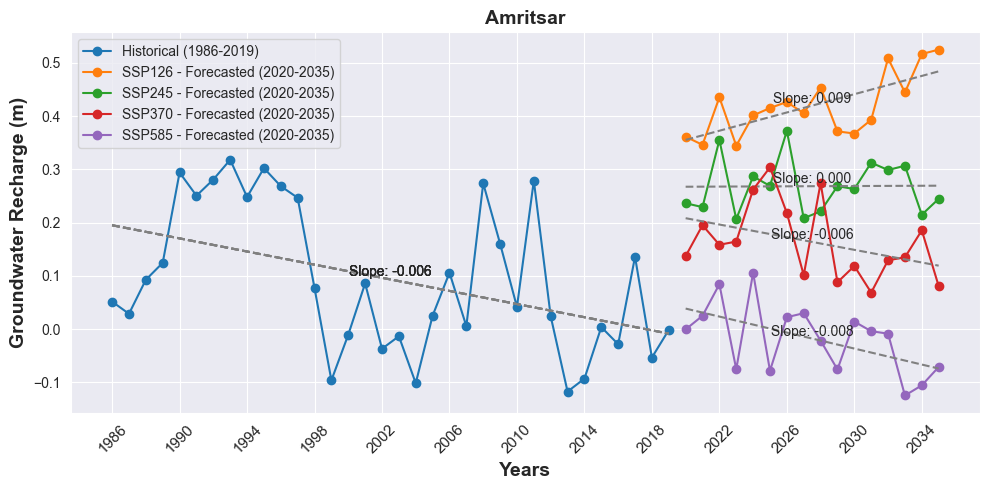

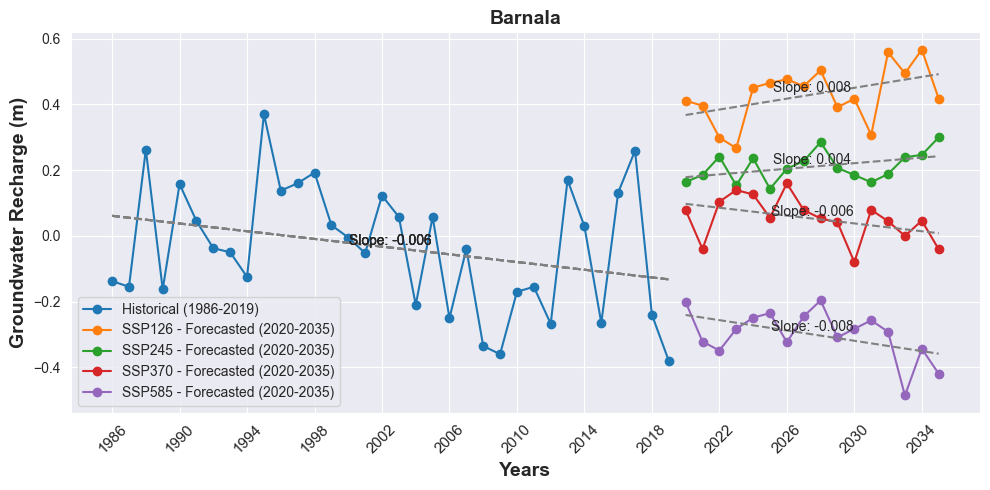

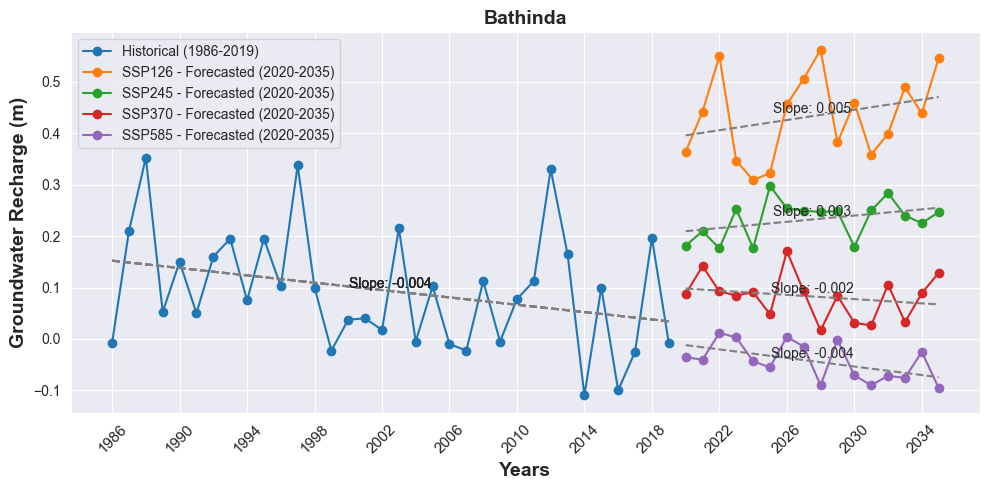

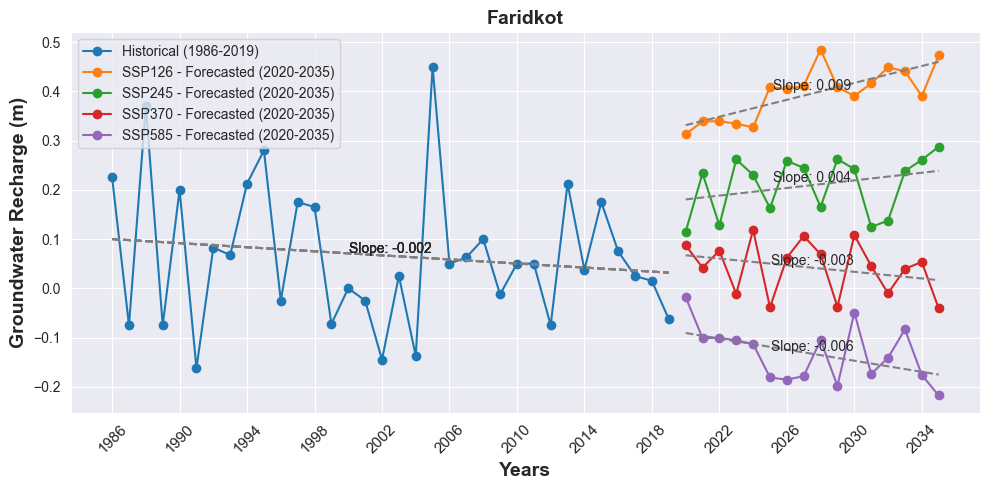

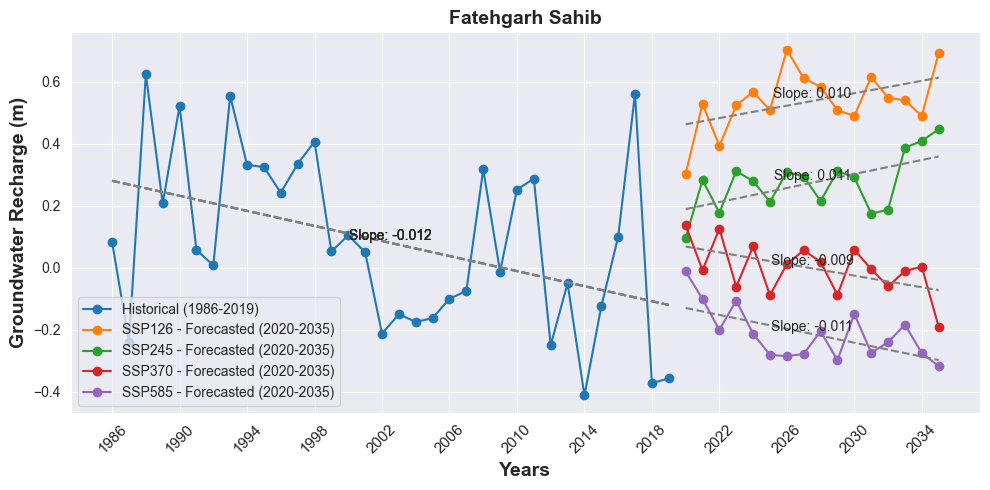

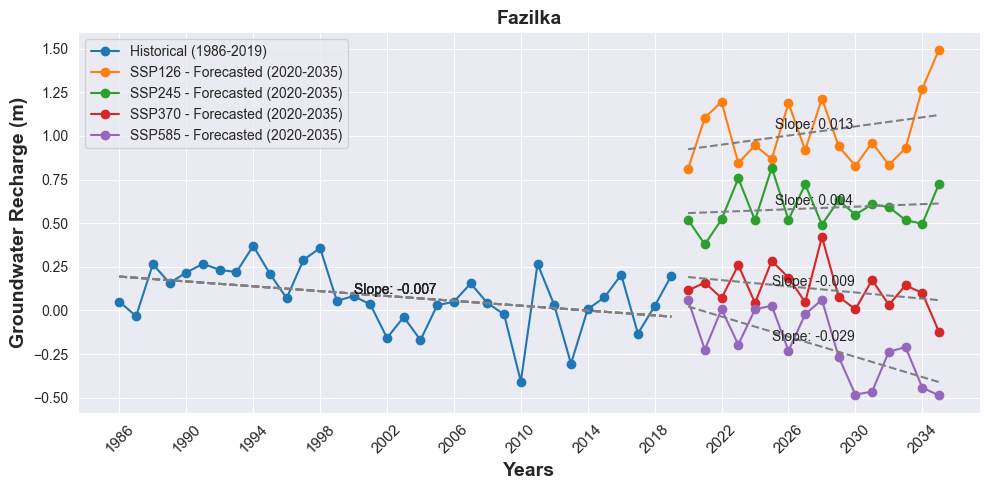

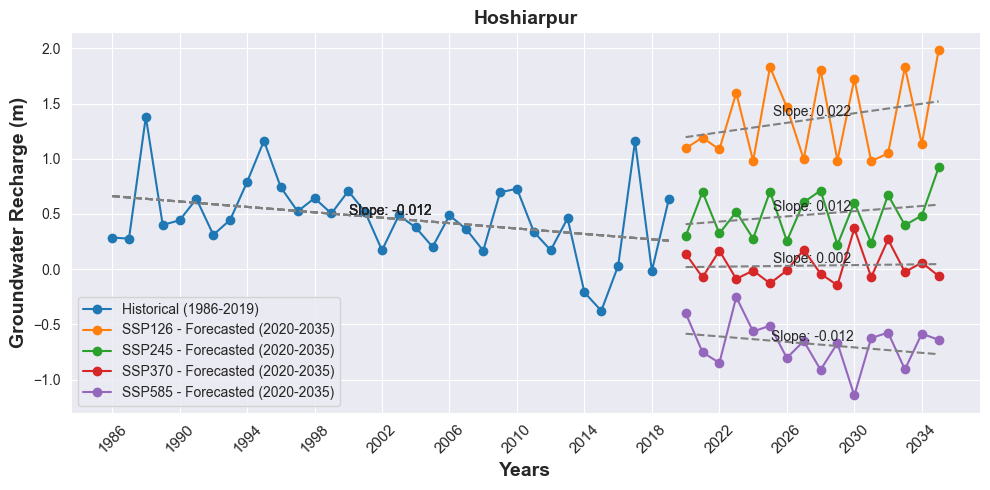

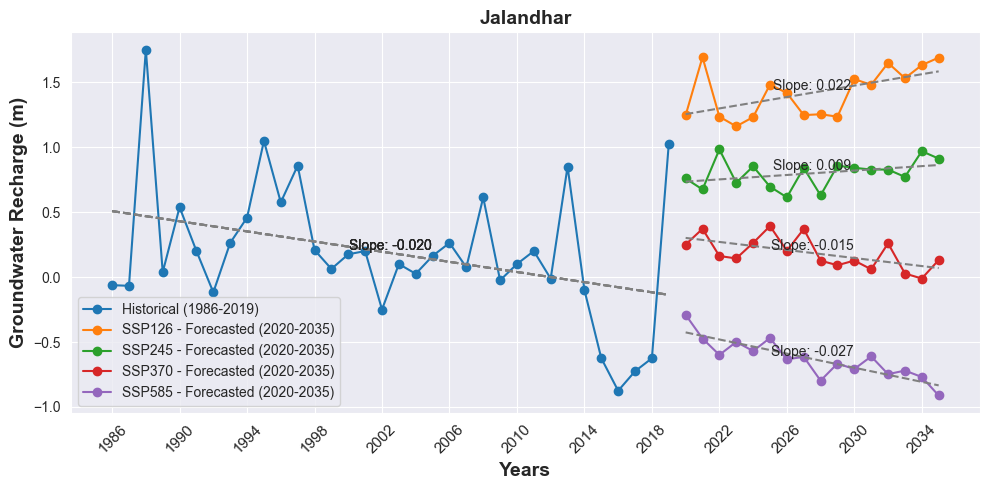

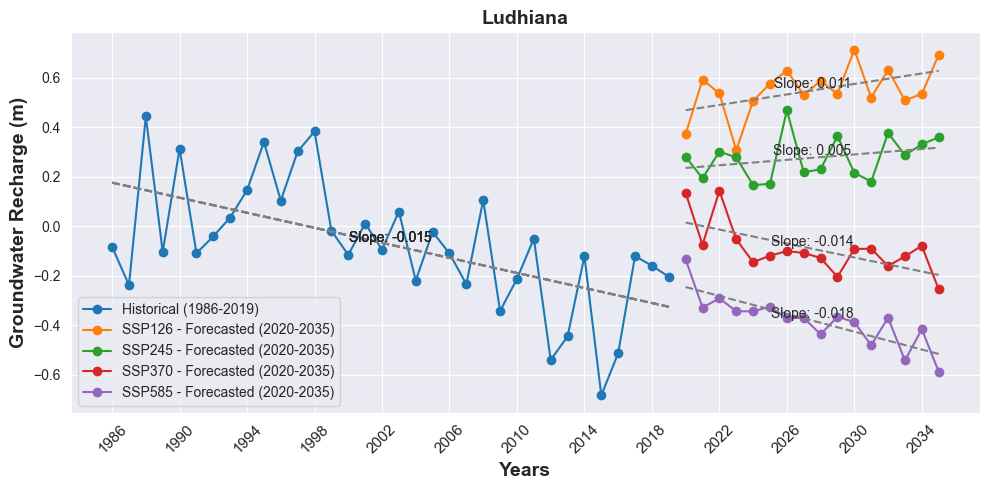

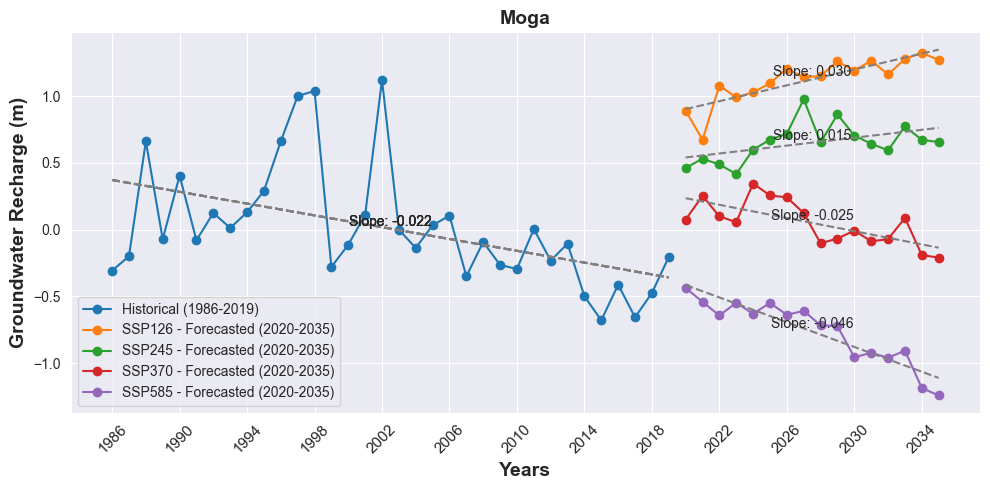

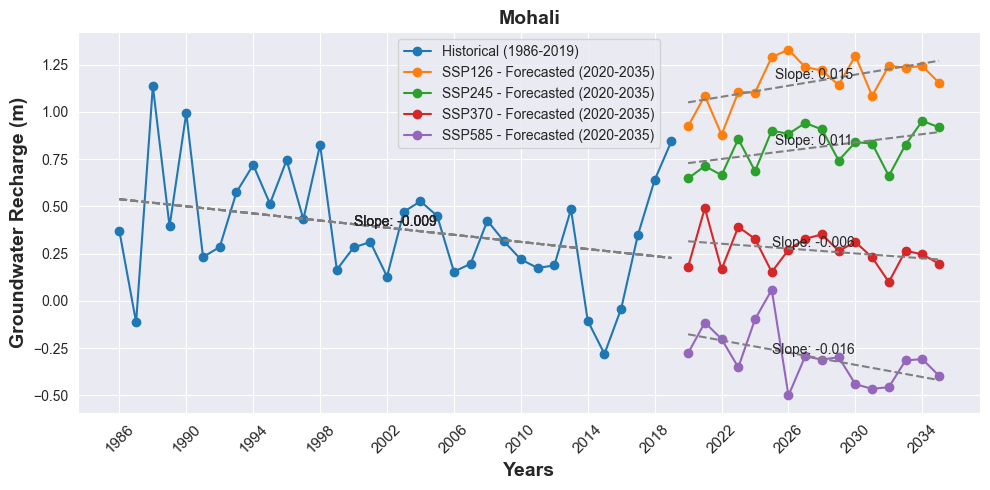

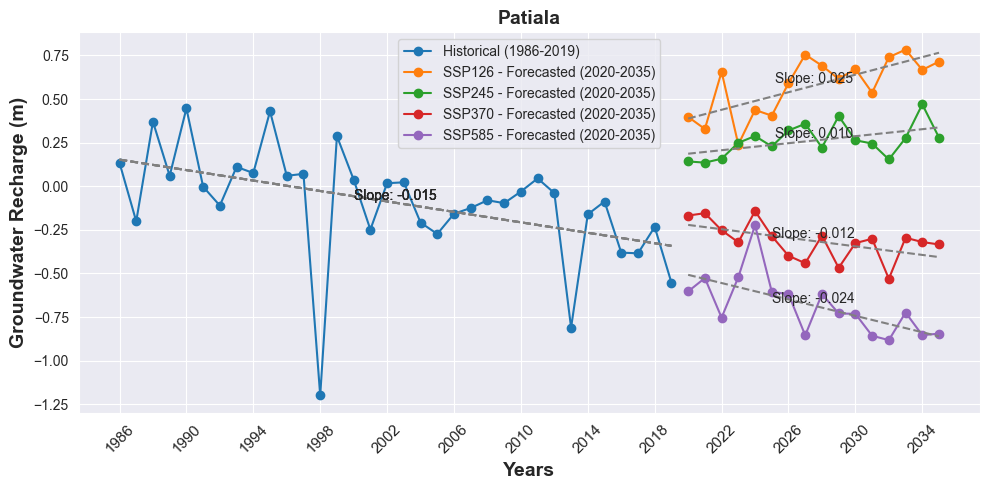

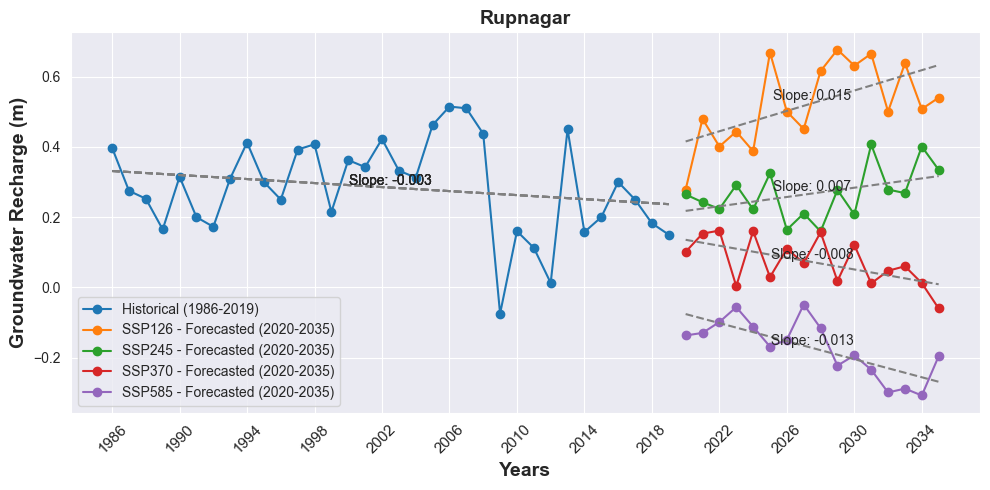

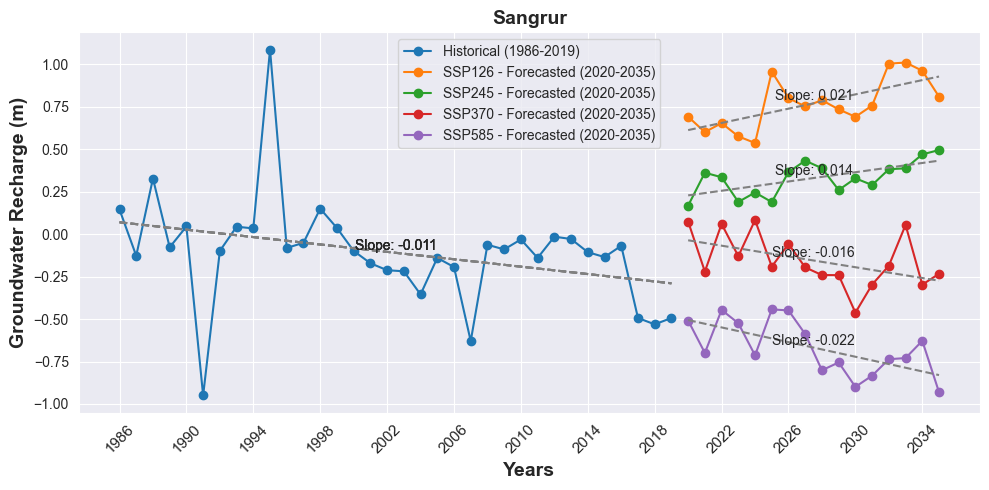

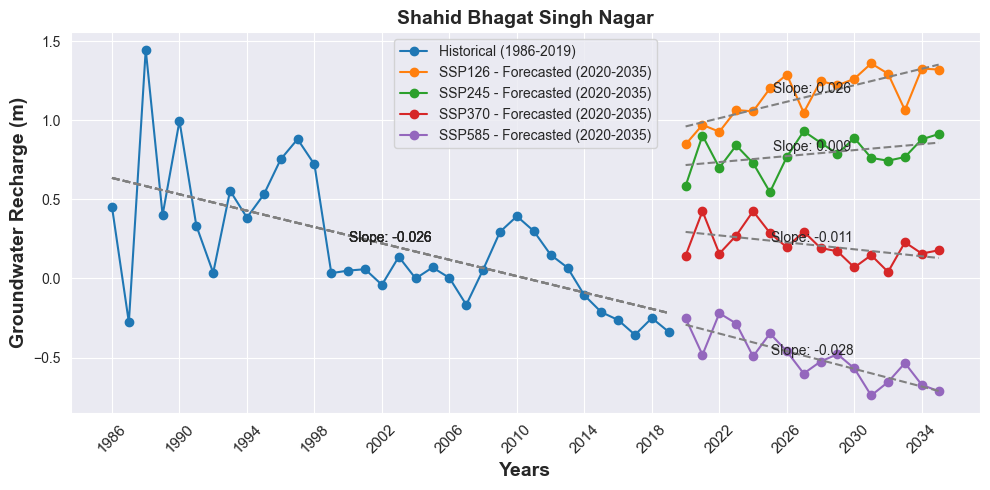

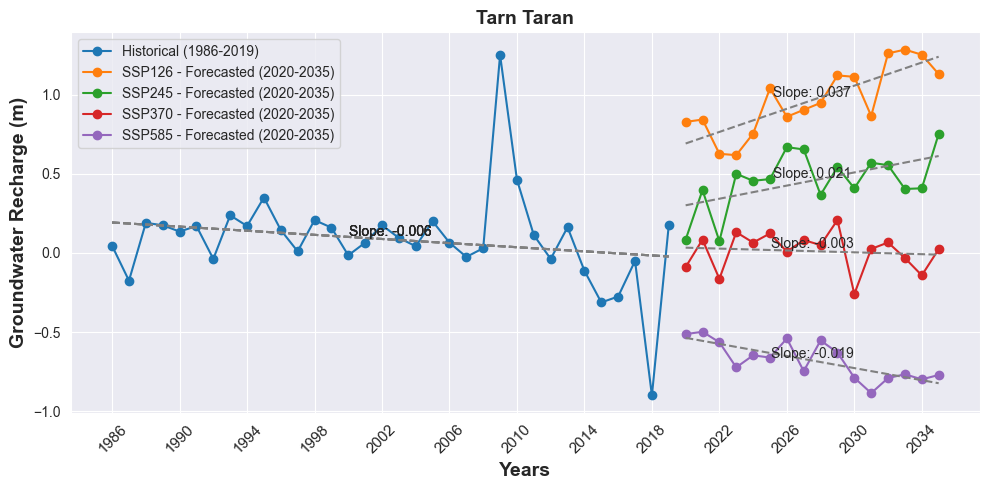

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x500 with 0 Axes>

In [19]:
for district in districts:
    plt.figure(figsize=(10, 5))

    for df, ssp in zip(df_list, SSP_list):
        data = df[df['District'] == district].values[0]
        historical_averages = data[1:35].astype(float)
        forecasted_averages = data[35:].astype(float)

        if ssp == SSP_list[0]:
            plt.plot(years[:34], historical_averages, label='Historical (1986-2019)', marker='o')

        plt.plot(years[34:], forecasted_averages, label=f'{ssp} - Forecasted (2020-2035)', marker='o')

        # Calculate and add trendlines
        x = np.arange(len(years))
        if len(historical_averages) > 1:
            z = np.polyfit(x[:len(historical_averages)], historical_averages, 1)
            p = np.poly1d(z)
            x_historical_mid = np.mean(years[:len(historical_averages)])
            y_historical_mid = np.mean(p(x[:len(historical_averages)]))
            plt.plot(years[:len(historical_averages)], p(x[:len(historical_averages)]), linestyle='--', color='gray')

            slope_historical = z[0]
            plt.text(x_historical_mid, y_historical_mid, f'Slope: {slope_historical:.3f}', ha='center', va='bottom')

        z = np.polyfit(x[len(historical_averages):], forecasted_averages, 1)
        p = np.poly1d(z)
        x_forecasted_mid = np.mean(years[len(historical_averages):])
        y_forecasted_mid = np.mean(p(x[len(historical_averages):]))
        plt.plot(years[len(historical_averages):], p(x[len(historical_averages):]), linestyle='--', color='gray')

        slope_forecasted = z[0]
        plt.text(x_forecasted_mid, y_forecasted_mid, f'Slope: {slope_forecasted:.3f}', ha='center', va='bottom')

    plt.xticks(list(years)[::4], rotation=45, fontsize=11)
    plt.xlabel('Years', fontsize=14, fontweight='bold')
    plt.ylabel('Groundwater Recharge (m)', fontsize=14, fontweight='bold')
    plt.title(f'{district}', fontsize=14, fontweight='bold')

    plt.legend()  # Add a single legend for all plots
    plt.tight_layout()
    plt.savefig(f'B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Panel plots\\{district}.png', dpi=1200)
    plt.show()


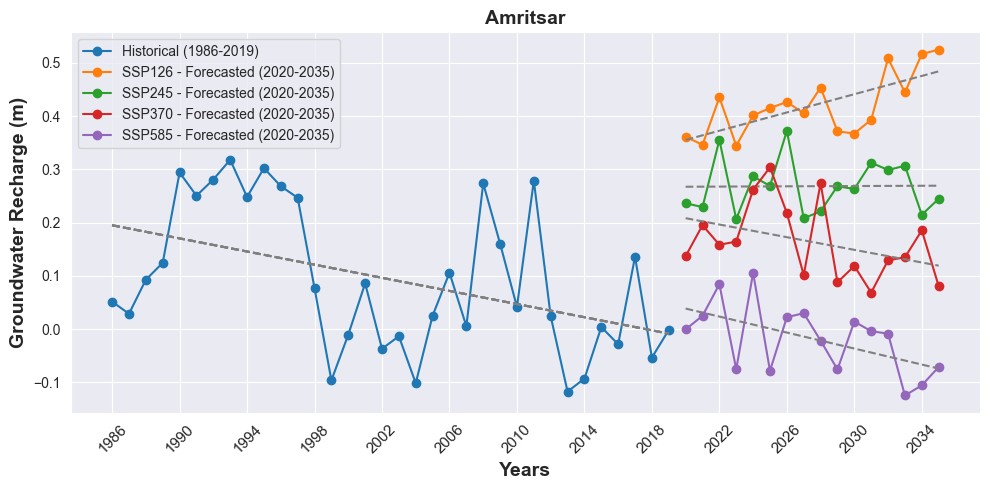

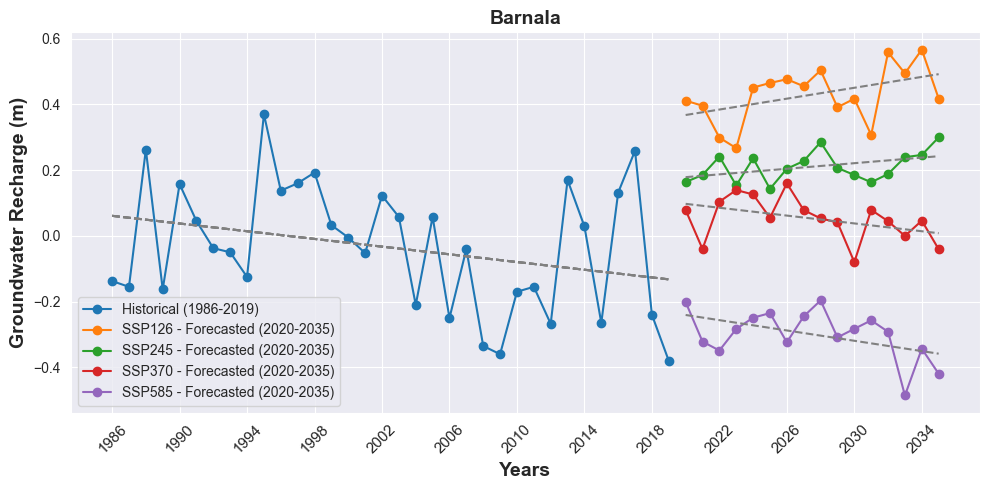

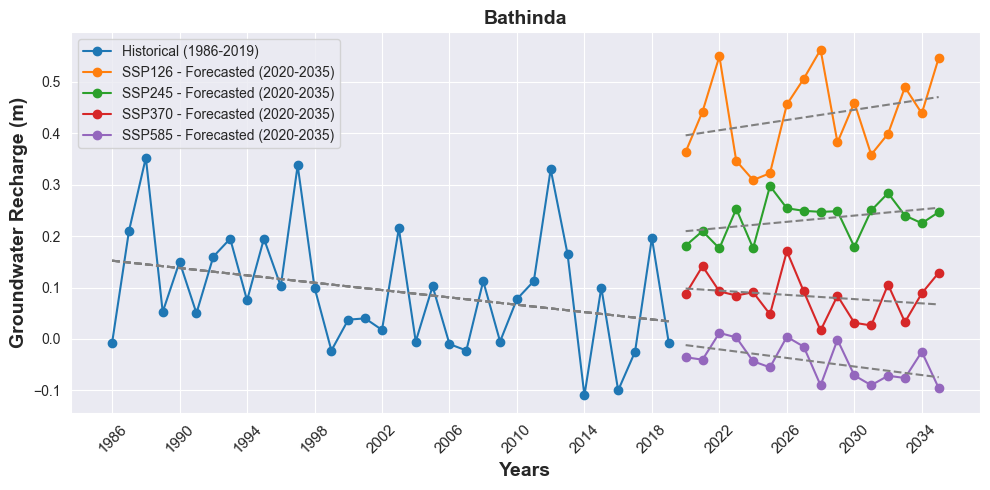

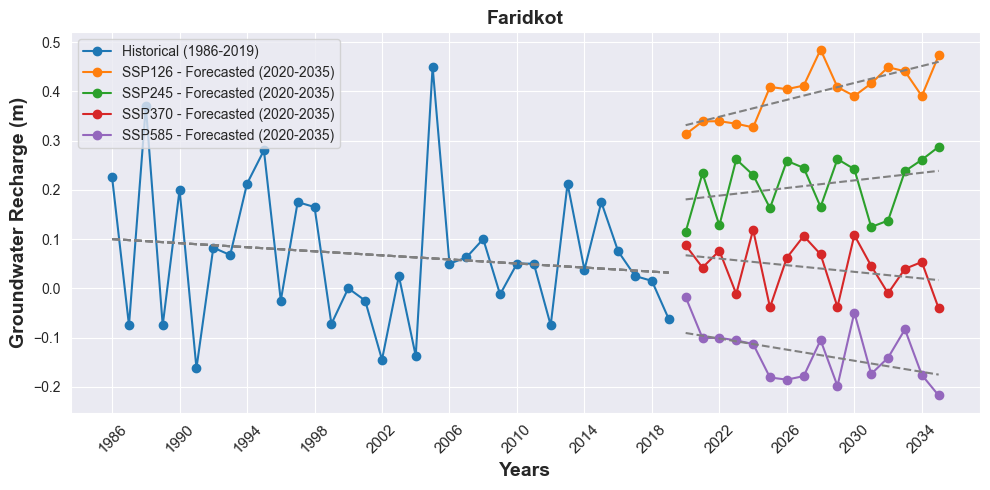

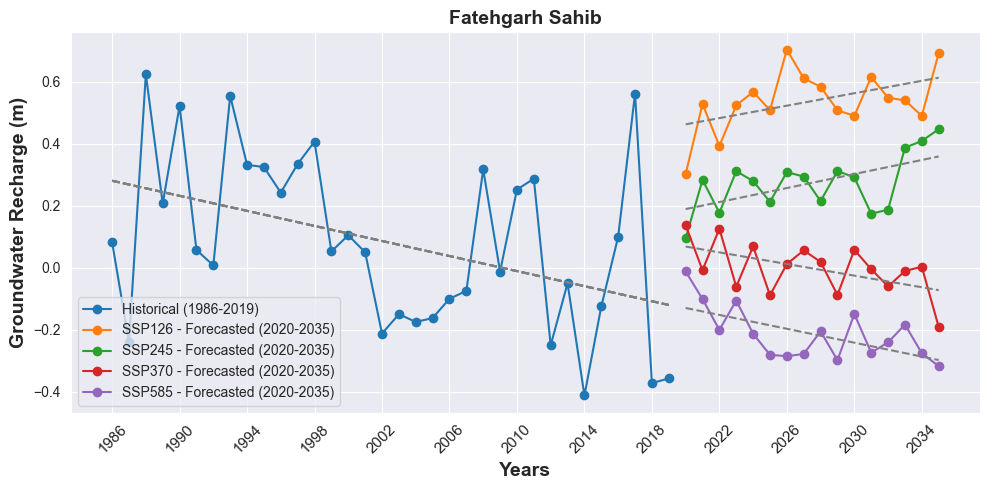

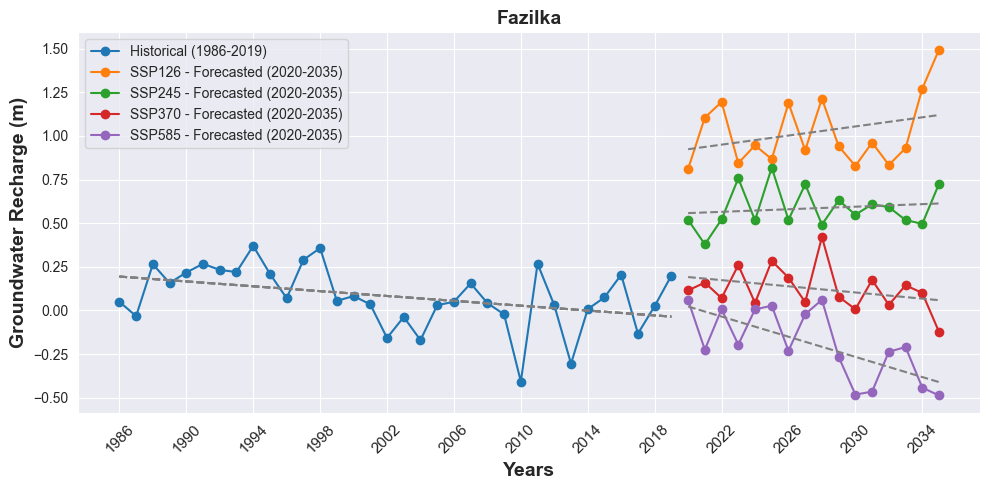

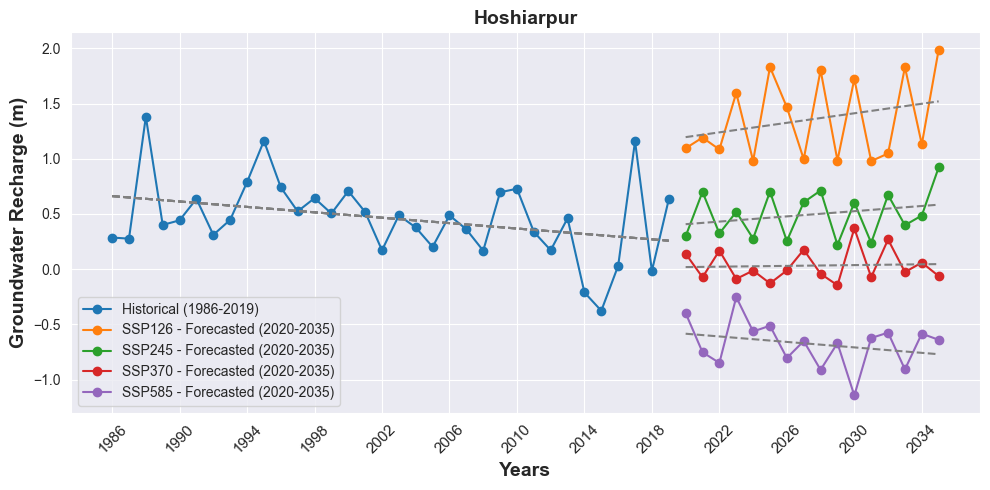

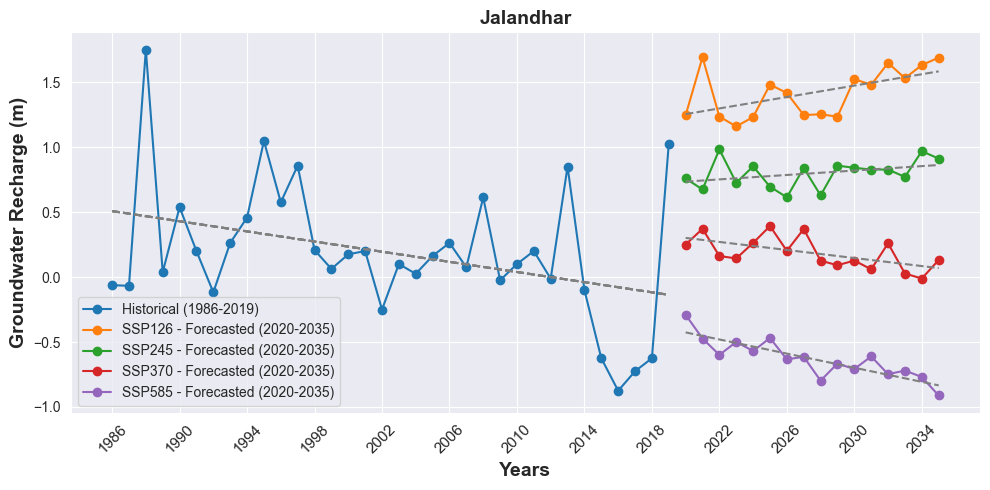

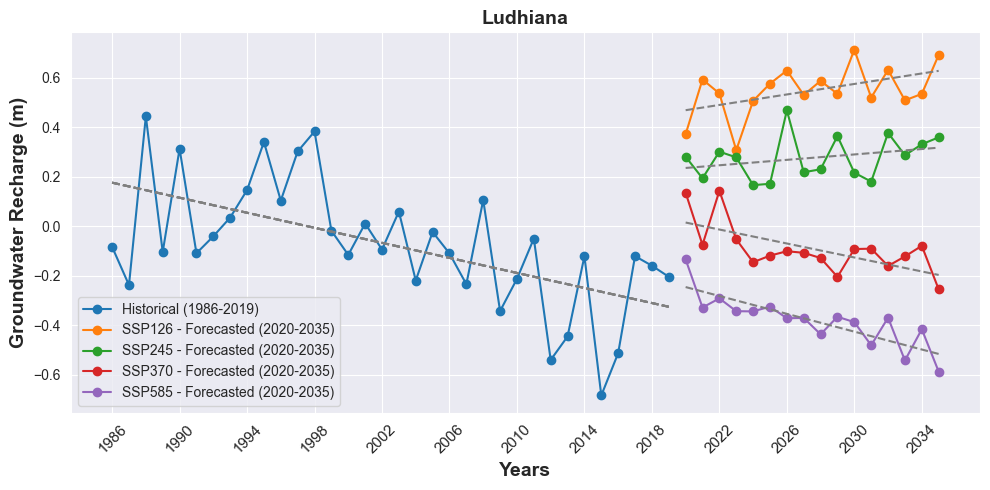

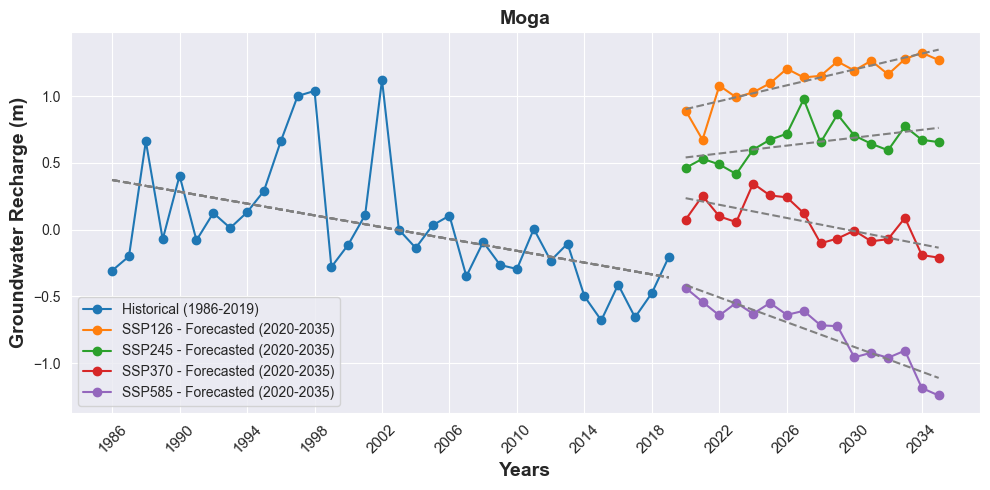

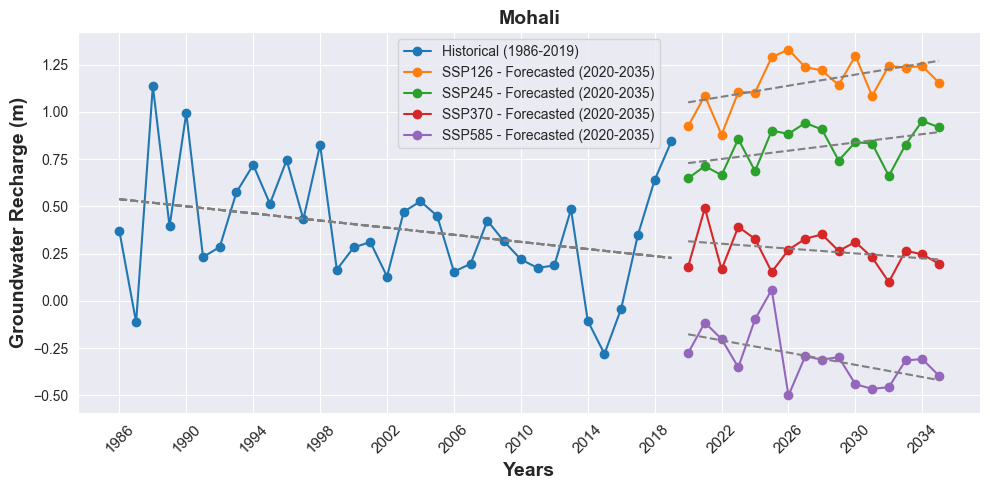

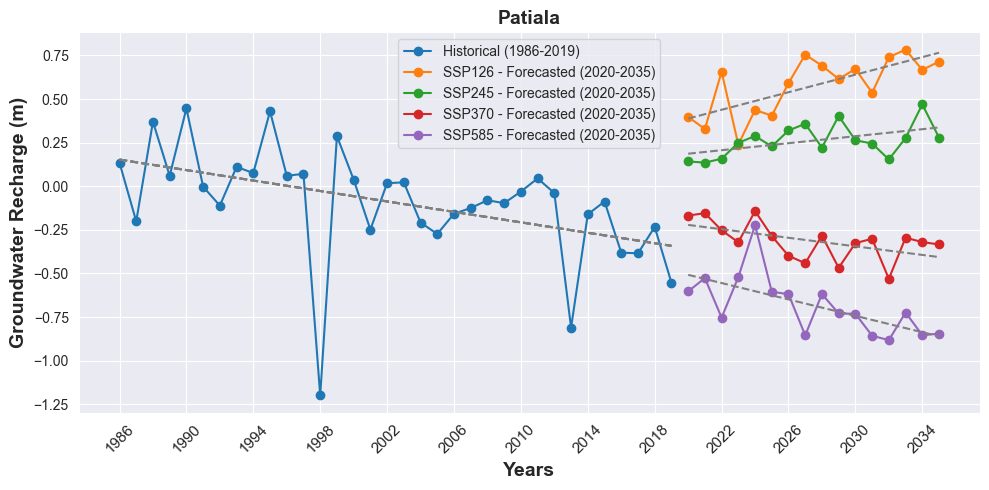

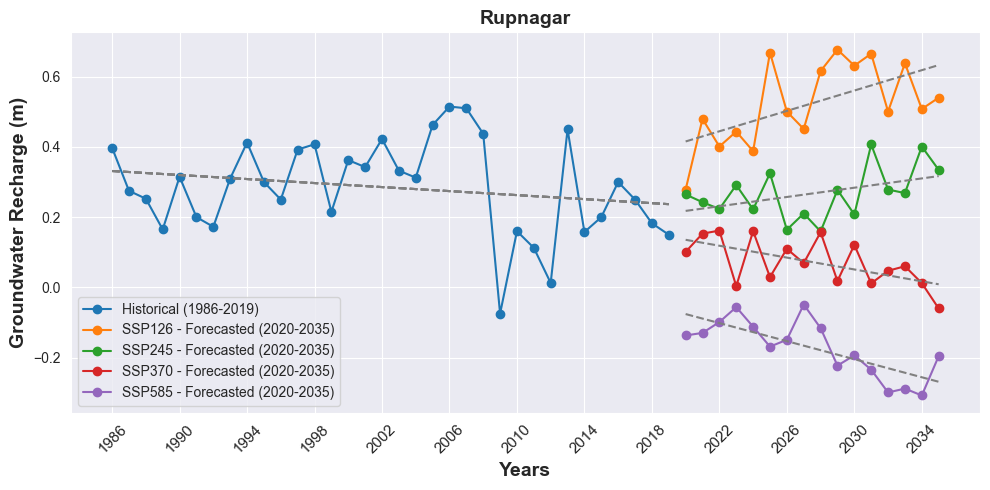

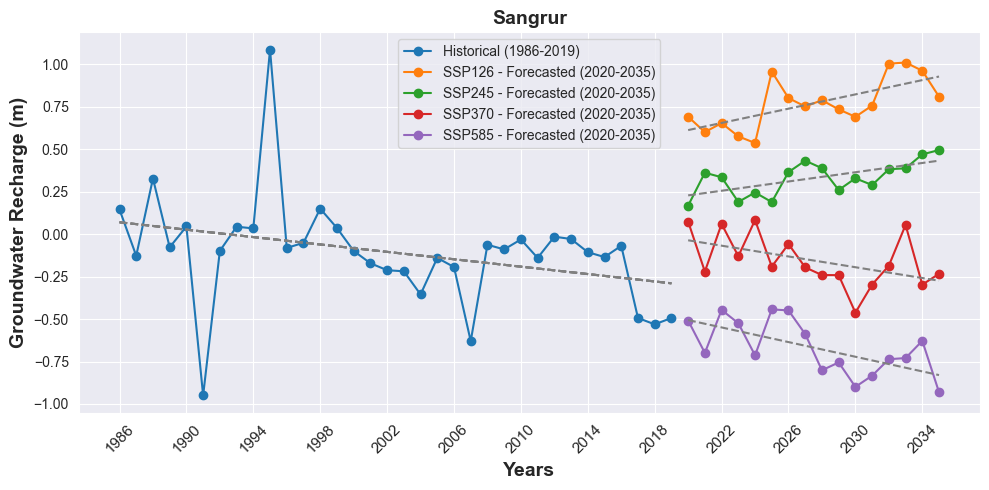

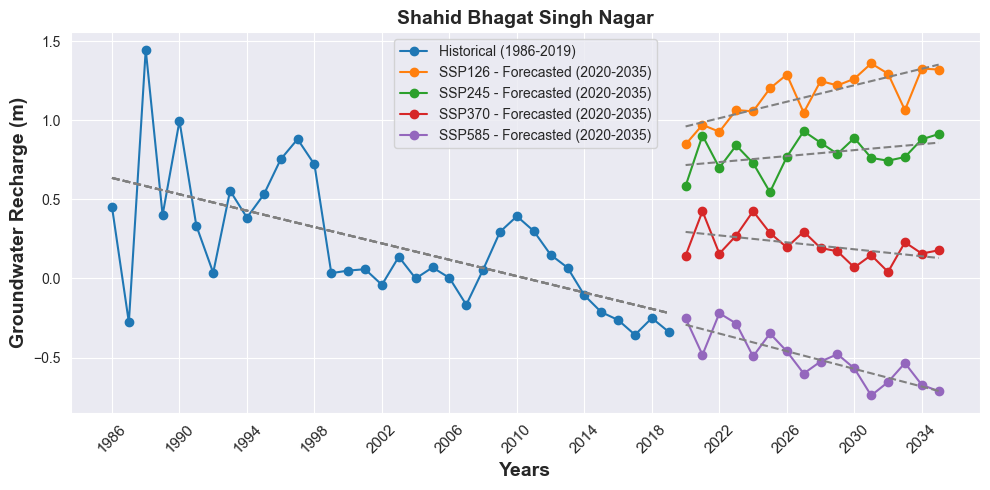

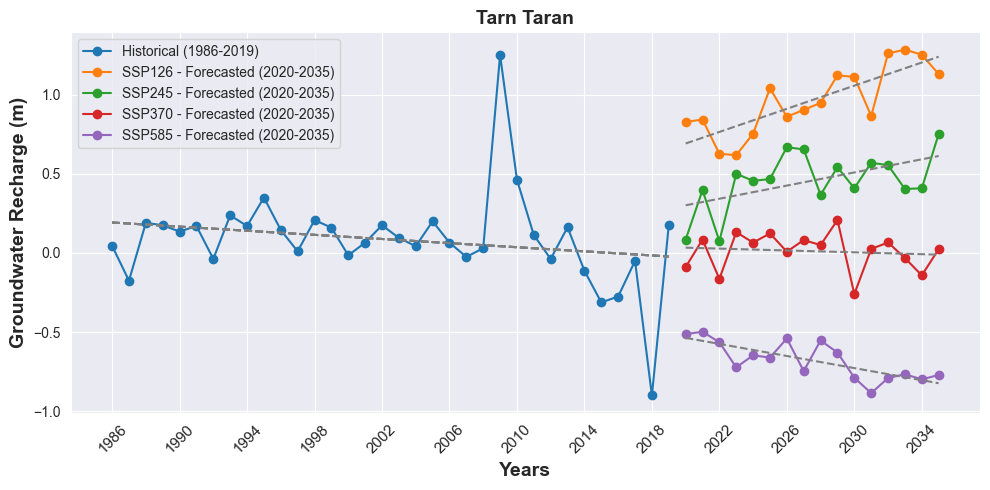

IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1000x500 with 0 Axes>

In [15]:
for district in districts:
    plt.figure(figsize=(10, 5))

    for df, ssp in zip(df_list, SSP_list):
        data = df[df['District'] == district].values[0]
        historical_averages = data[1:35].astype(float)
        forecasted_averages = data[35:].astype(float)

        if ssp == SSP_list[0]:
            plt.plot(years[:34], historical_averages, label='Historical (1986-2019)', marker='o')

        plt.plot(years[34:], forecasted_averages, label=f'{ssp} - Forecasted (2020-2035)', marker='o')

        x = np.arange(len(years))
        if len(historical_averages) > 1:
            z = np.polyfit(x[:len(historical_averages)], historical_averages, 1)
            p = np.poly1d(z)
            plt.plot(years[:len(historical_averages)], p(x[:len(historical_averages)]), linestyle='--', color='gray')

        z = np.polyfit(x[len(historical_averages):], forecasted_averages, 1)
        p = np.poly1d(z)
        plt.plot(years[len(historical_averages):], p(x[len(historical_averages):]), linestyle='--', color='gray')

    plt.xticks(list(years)[::4], rotation=45, fontsize=11)
    plt.xlabel('Years', fontsize=14, fontweight='bold')
    plt.ylabel('Groundwater Recharge (m)', fontsize=14, fontweight='bold')
    plt.title(f'{district}', fontsize=14, fontweight='bold')

    plt.legend()
    plt.tight_layout()
    plt.savefig(f'B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Panel plots\\{district}.png', dpi=1200)
    plt.show()

## Each District Graph

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

for i in [126, 245, 370, 585]:
    df = pd.read_excel(f"B:\GroundwaterRech\GithubRepo\Restart\Forecast_new\DistrictWise-Forecast(Pre-Post) (1)(1).xlsx", sheet_name=f'SSP{i}')
    df.drop('Slope', axis=1, inplace=True)
    years = df.columns[1:]
    districts = list(df['District'])

    for d in range(7,8):
        data = df.iloc[d]
        historical_averages = data[1:35].astype(float)
        forecasted_averages = data[35:].astype(float)

        historical_x = np.arange(len(historical_averages))
        historical_z = np.polyfit(historical_x, historical_averages, 1)
        historical_p = np.poly1d(historical_z)
        historical_trendline = historical_p(historical_x)

        forecasted_x = np.arange(len(forecasted_averages)) + len(historical_averages)
        forecasted_z = np.polyfit(forecasted_x, forecasted_averages, 1)
        forecasted_p = np.poly1d(forecasted_z)
        forecasted_trendline = forecasted_p(forecasted_x)

        slope_historical = historical_z[0]
        slope_forecasted = forecasted_z[0]

        plt.figure(figsize=(12, 6))
        plt.plot(data.index[1:35], data.values[1:35], color='blue', label='Historical (1986-2019)', marker='o')
        plt.plot(data.index[35:], data.values[35:], color='orange', label='Forecasted (2020-2035)', marker='o')
        plt.plot(data.index[1:35], historical_trendline, color='red', linestyle='--', label='Historical Trendline')
        plt.plot(data.index[35:], forecasted_trendline, color='green', linestyle='--', label='Forecasted Trendline')

        plt.xlabel('Year',fontsize=16,fontweight='bold')
        plt.ylabel('Groundwater Recharge (m)',fontsize=16,fontweight='bold')
        plt.title(f'{districts[d]}:- SSP{i}',fontsize=16,fontweight='bold')
        plt.legend(prop={'weight':'bold'})
        plt.yticks(fontsize=11,fontweight='bold')
        plt.xticks(list(years)[::4],rotation=45,fontsize=11)

        plt.text(data.index[17], historical_trendline[-1]-0.05, f'Historical Slope: {slope_historical:.4f}', color='red', ha='center', va='top')
        plt.text(data.index[43], forecasted_trendline[0]-0.05, f'Forecasted Slope: {slope_forecasted:.4f}', color='green', ha='center', va='top')
        plt.tight_layout()
        plt.savefig(f'B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Forecasted Individual Plots\\SSP_{i}_{districts[d]}.png', dpi=1200)
        plt.close()


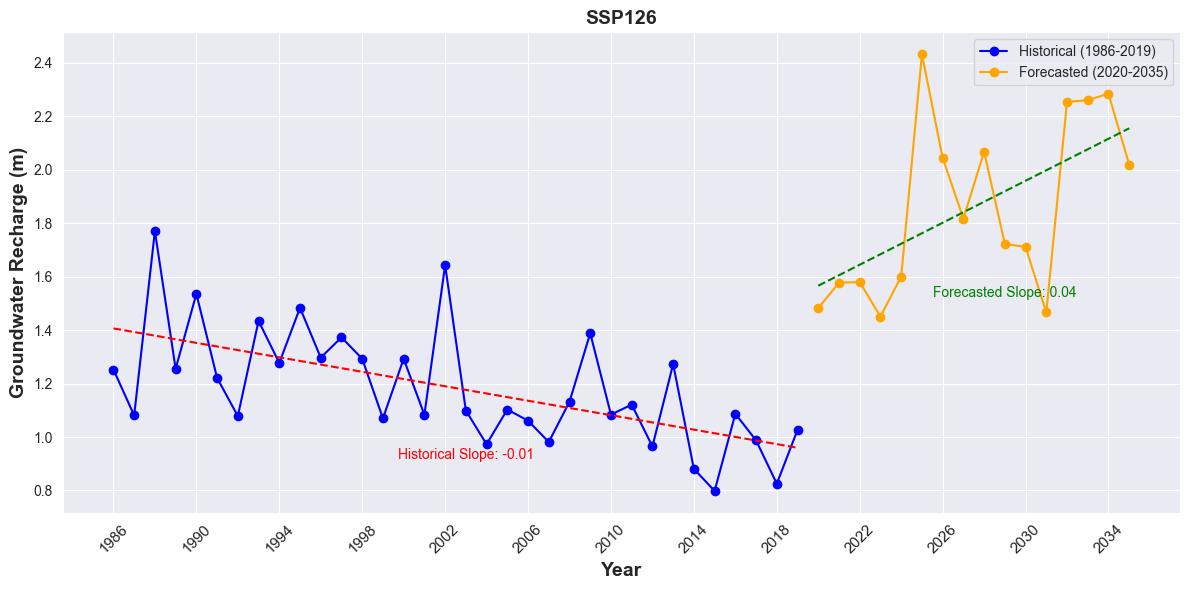

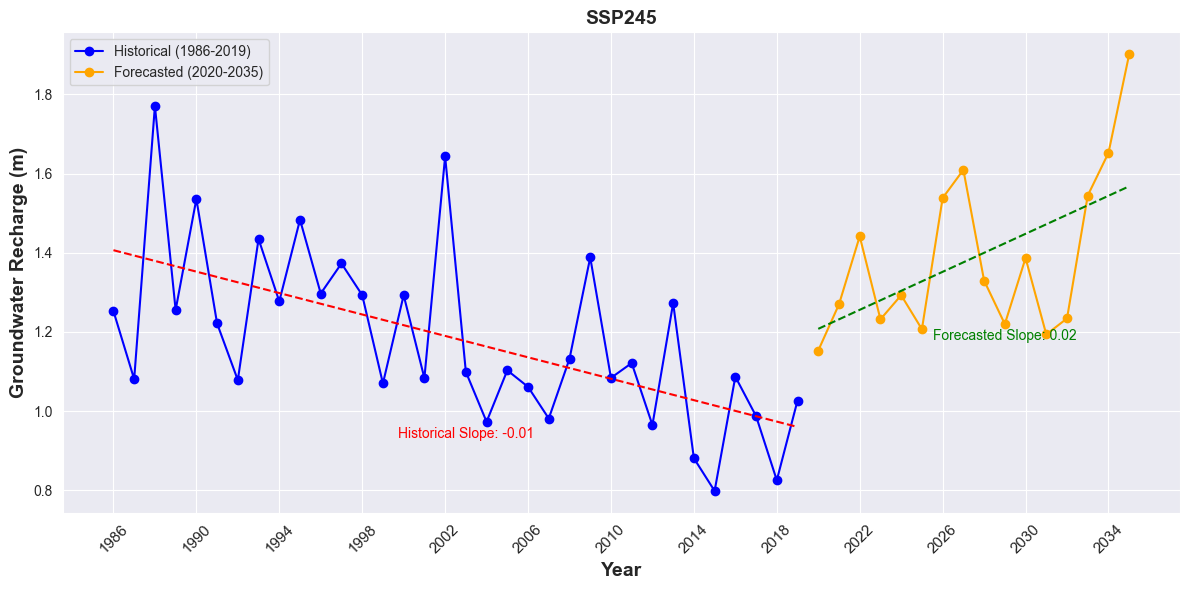

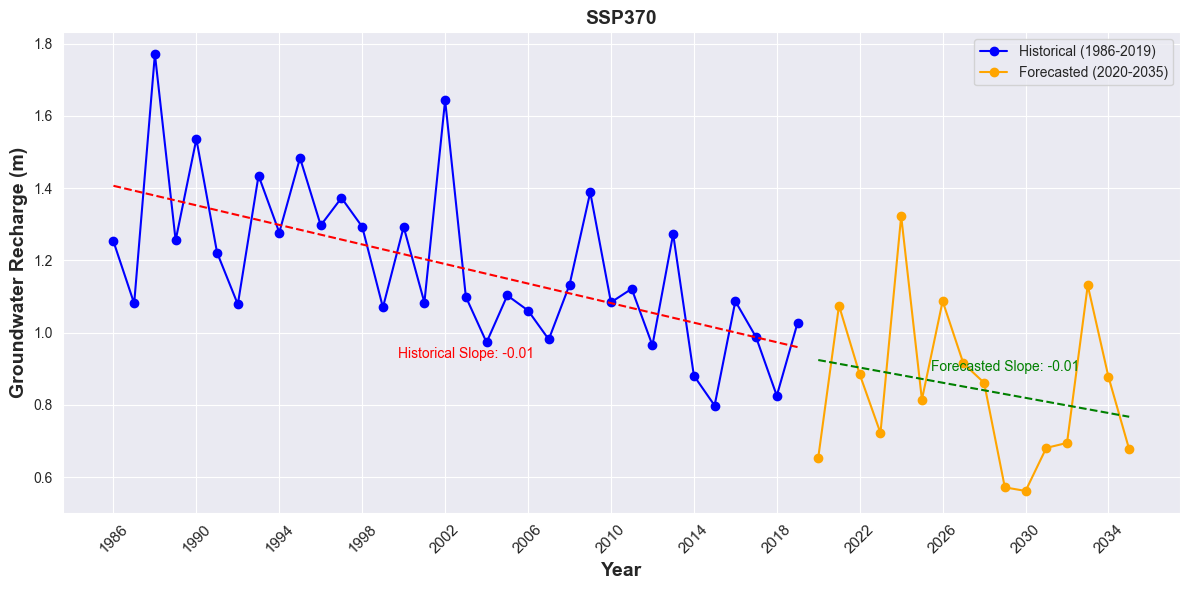

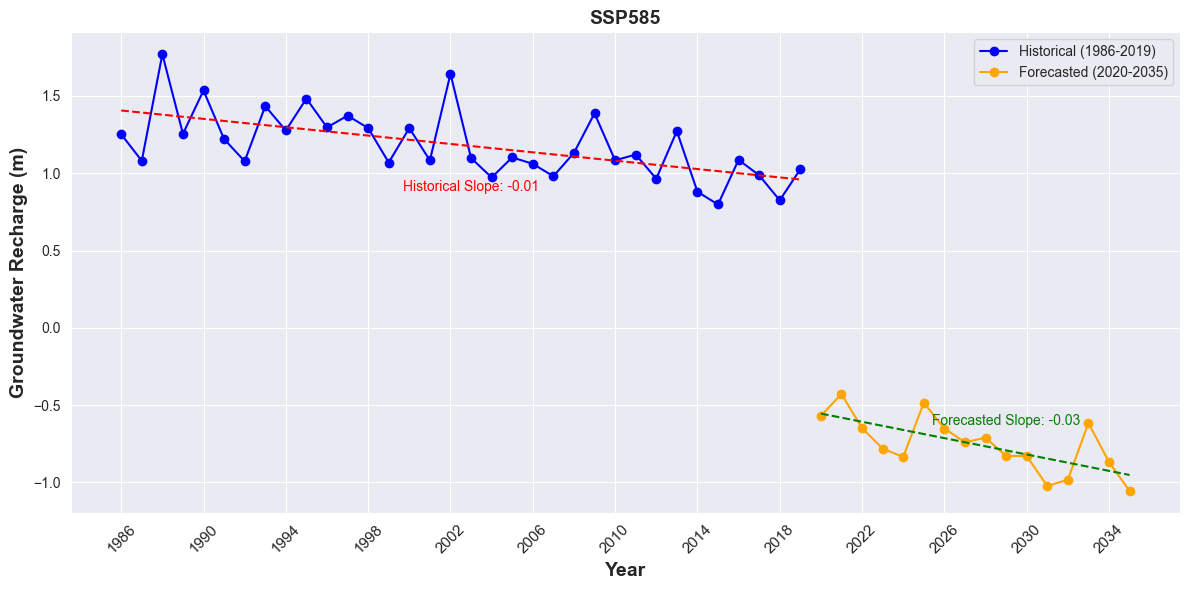

In [27]:
df=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\GroundwaterLevel\Dataset\DistrictWiseLEVEL.xlsx",sheet_name="Historical_Recharge")
years = df['Year']

for i in [126, 245, 370, 585]:
    averages = df['SSP'+str(i)]

    historical_averages = averages[:34]
    forecasted_averages = averages[34:]

    historical_x = np.arange(len(historical_averages))
    historical_z = np.polyfit(historical_x, historical_averages, 1)
    historical_p = np.poly1d(historical_z)
    historical_trendline = historical_p(historical_x)

    forecasted_x = np.arange(len(forecasted_averages)) + len(historical_averages)
    forecasted_z = np.polyfit(forecasted_x, forecasted_averages, 1)
    forecasted_p = np.poly1d(forecasted_z)
    forecasted_trendline = forecasted_p(forecasted_x)

    plt.figure(figsize=(12, 6))
    plt.plot(years[:34], averages.values[:34], color='blue', label='Historical (1986-2019)', marker='o')
    plt.plot(years[34:], averages.values[34:], color='orange', label='Forecasted (2020-2035)', marker='o')
    plt.plot(years[:34], historical_trendline, color='red', linestyle='--')
    plt.plot(years[34:], forecasted_trendline, color='green', linestyle='--')

    historical_slope = historical_z[0]
    forecasted_slope = forecasted_z[0]


    plt.text(years[17], historical_trendline[-1], f'Historical Slope: {historical_slope:.2f}', color='red', ha='center', va='top')
    plt.text(years[43], forecasted_trendline[0], f'Forecasted Slope: {forecasted_slope:.2f}', color='green', ha='center', va='top')
    plt.xlabel('Year',fontsize=14,fontweight='bold')
    plt.ylabel('Groundwater Recharge (m)',fontsize=14,fontweight='bold')
    plt.title(f'SSP{i}',fontsize=14,fontweight='bold')
    plt.legend()
    plt.xticks(list(years)[::4],rotation=45,fontsize=11)
    plt.tight_layout()
    plt.savefig(f'B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Forecasted Plots Punjab\\SSP_{i}.png', dpi=1200)
    plt.show()


### Groundwater Recharge for Differernt SSP


C:\Users\shash\AppData\Local\Temp\ipykernel_2104\3063360003.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  historical_averages = averages[:34]
C:\Users\shash\AppData\Local\Temp\ipykernel_2104\3063360003.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  forecasted_averages = averages[34:]


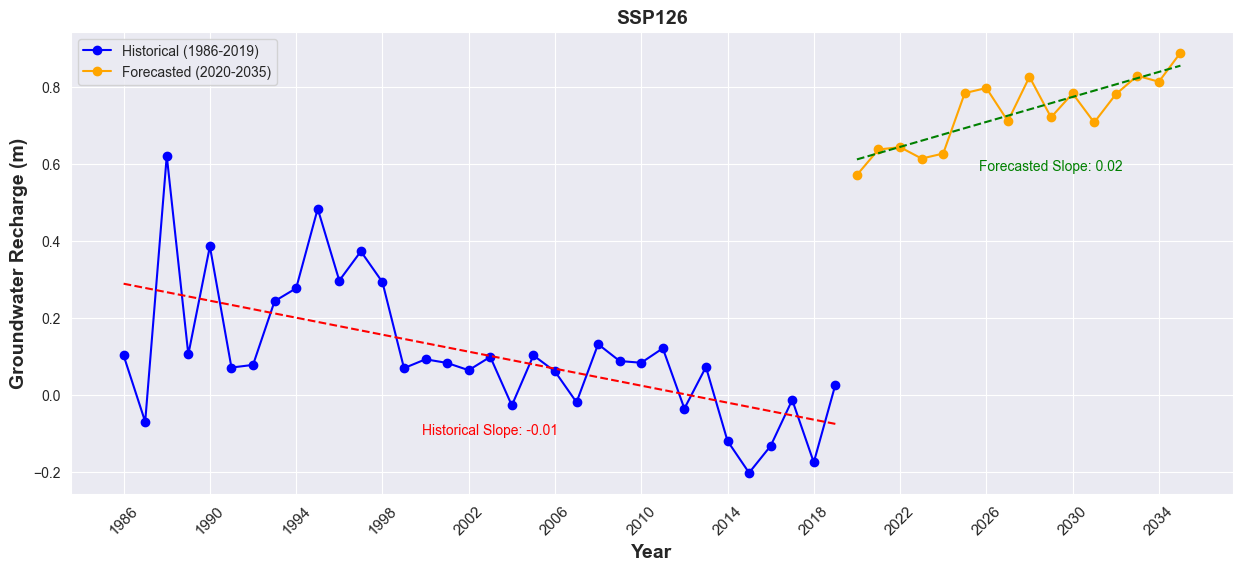

C:\Users\shash\AppData\Local\Temp\ipykernel_2104\3063360003.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  historical_averages = averages[:34]
C:\Users\shash\AppData\Local\Temp\ipykernel_2104\3063360003.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  forecasted_averages = averages[34:]


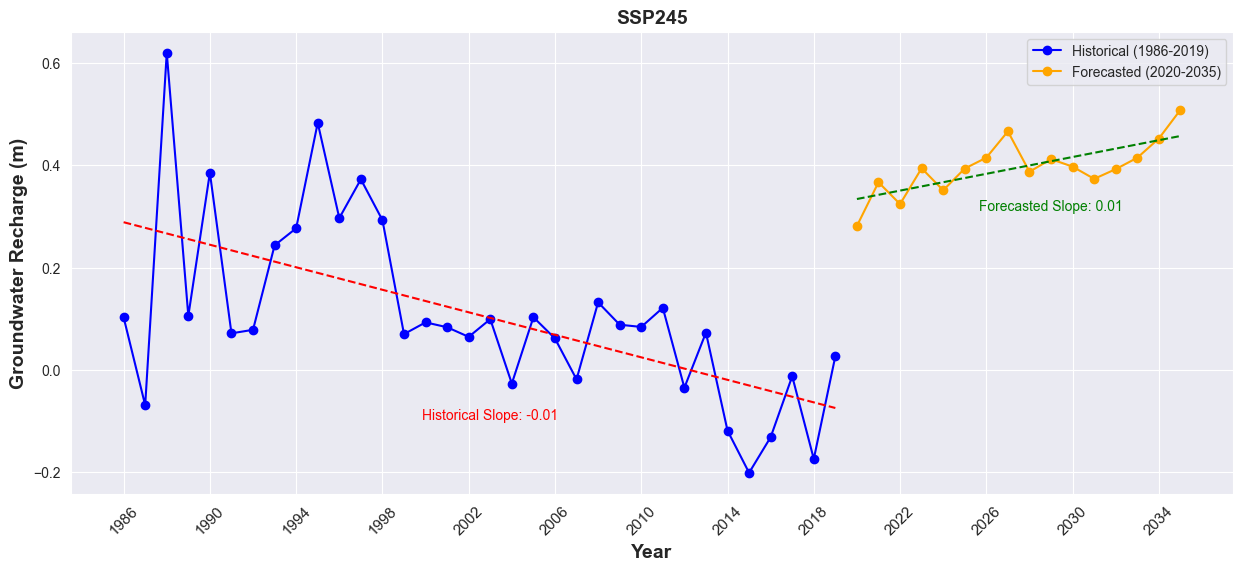

C:\Users\shash\AppData\Local\Temp\ipykernel_2104\3063360003.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  historical_averages = averages[:34]
C:\Users\shash\AppData\Local\Temp\ipykernel_2104\3063360003.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  forecasted_averages = averages[34:]


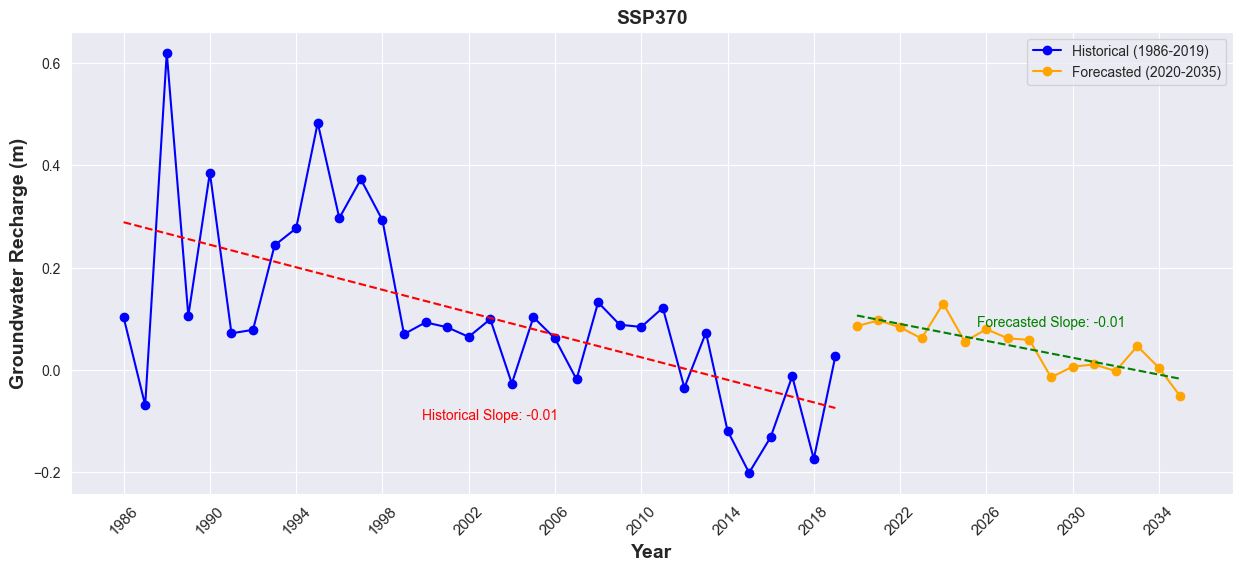

C:\Users\shash\AppData\Local\Temp\ipykernel_2104\3063360003.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  historical_averages = averages[:34]
C:\Users\shash\AppData\Local\Temp\ipykernel_2104\3063360003.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  forecasted_averages = averages[34:]


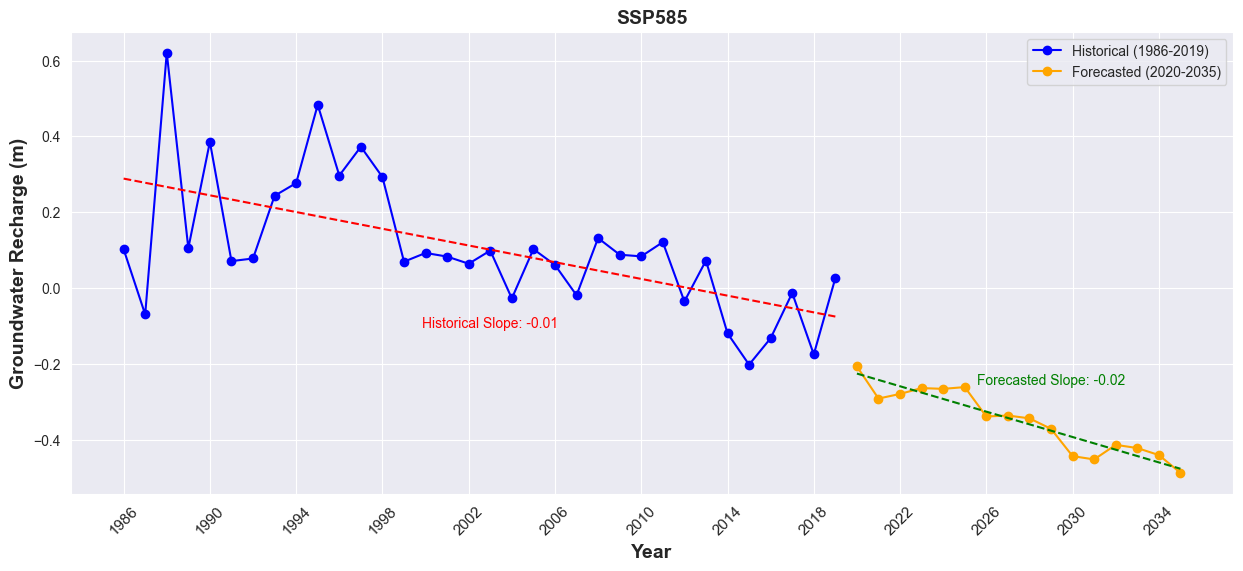

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

for i in [126, 245, 370, 585]:
    df = pd.read_excel(f"B:\GroundwaterRech\GithubRepo\Restart\Forecast_new\DistrictWise-Forecast(Pre-Post) (1)(1).xlsx", sheet_name=f'SSP{i}')
    df.drop('Slope', axis=1, inplace=True)
    years = df.columns[1:]
    averages = df[years].mean()

    historical_averages = averages[:34]
    forecasted_averages = averages[34:]

    historical_x = np.arange(len(historical_averages))
    historical_z = np.polyfit(historical_x, historical_averages, 1)
    historical_p = np.poly1d(historical_z)
    historical_trendline = historical_p(historical_x)

    forecasted_x = np.arange(len(forecasted_averages)) + len(historical_averages)
    forecasted_z = np.polyfit(forecasted_x, forecasted_averages, 1)
    forecasted_p = np.poly1d(forecasted_z)
    forecasted_trendline = forecasted_p(forecasted_x)

    plt.figure(figsize=(15, 6))
    plt.plot(years[:34], averages.values[:34], color='blue', label='Historical (1986-2019)', marker='o')
    plt.plot(averages.index[34:], averages.values[34:], color='orange', label='Forecasted (2020-2035)', marker='o')
    plt.plot(averages.index[:34], historical_trendline, color='red', linestyle='--')
    plt.plot(averages.index[34:], forecasted_trendline, color='green', linestyle='--')

    historical_slope = historical_z[0]
    forecasted_slope = forecasted_z[0]


    plt.text(averages.index[17], historical_trendline[-1], f'Historical Slope: {historical_slope:.2f}', color='red', ha='center', va='top')
    plt.text(averages.index[43], forecasted_trendline[0], f'Forecasted Slope: {forecasted_slope:.2f}', color='green', ha='center', va='top')
    plt.xlabel('Year',fontsize=14,fontweight='bold')
    plt.ylabel('Groundwater Recharge (m)',fontsize=14,fontweight='bold')
    plt.title(f'SSP{i}',fontsize=14,fontweight='bold')
    plt.legend()
    plt.xticks(list(years)[::4],rotation=45,fontsize=11)

    plt.savefig(f'B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Forecasted Plots Punjab\\SSP_{i}.png', dpi=1200)
    plt.show()


Panel 2x2


In [ ]:
# df=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\GroundwaterLevel\Dataset\DistrictWiseLEVEL.xlsx",sheet_name="Historical_Recharge")
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
#
# for i, ax in zip([126, 245, 370, 585], axes.flatten()):
#     years = df['Year'].values
#     averages = df['SSP'+str(i)]
#
#     historical_averages = averages[:34]
#     forecasted_averages = averages[34:]
#
#     historical_x = np.arange(len(historical_averages))
#     historical_z = np.polyfit(historical_x, historical_averages, 1)
#     historical_p = np.poly1d(historical_z)
#     historical_trendline = historical_p(historical_x)
#
#     forecasted_x = np.arange(len(forecasted_averages)) + len(historical_averages)
#     forecasted_z = np.polyfit(forecasted_x, forecasted_averages, 1)
#     forecasted_p = np.poly1d(forecasted_z)
#     forecasted_trendline = forecasted_p(forecasted_x)
#
#     ax.plot(years[:34], averages.values[:34], color='blue', label='Historical (1986-2019)', marker='o')
#     ax.plot(years[34:], averages.values[34:], color='orange', label='Forecasted (2020-2035)', marker='o')
#     ax.plot(years[:34], historical_trendline, color='red', linestyle='--')
#     ax.plot(years[34:], forecasted_trendline, color='green', linestyle='--')
#
#     historical_slope = historical_z[0]
#     forecasted_slope = forecasted_z[0]
#     ymax = max(max(historical_trendline), max(forecasted_trendline))
#     ax.text(0.5, 0.95, f'Historical Slope: {historical_slope:.2f}', transform=ax.transAxes, color='red', ha='center', va='top')
#     ax.text(0.5, 0.90, f'Forecasted Slope: {forecasted_slope:.2f}', transform=ax.transAxes, color='green', ha='center', va='top')
#
#     ax.set_xlabel('Year',fontsize=14,fontweight='bold')
#     ax.set_ylabel('Groundwater Recharge (m)',fontsize=14,fontweight='bold')
#     ax.set_title(f'SSP{i}',fontsize=14,fontweight='bold')
#     ax.legend()
#     ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
#
# plt.tight_layout()
#
# # Set the title for the entire figure with a larger font size, bold text, and background color
# fig.suptitle('Groundwater Recharge Forecast for Punjab under Various SSPs', fontsize=16, fontweight='bold')
# plt.subplots_adjust(top=0.90)
# plt.savefig(f'B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Forecasted Plots Punjab\Subplotss.png', dpi=1200)
# plt.show()


C:\Users\shash\AppData\Local\Temp\ipykernel_12284\3815596192.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  historical_averages = averages[:34]
C:\Users\shash\AppData\Local\Temp\ipykernel_12284\3815596192.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  forecasted_averages = averages[34:]
C:\Users\shash\AppData\Local\Temp\ipykernel_12284\3815596192.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this wi

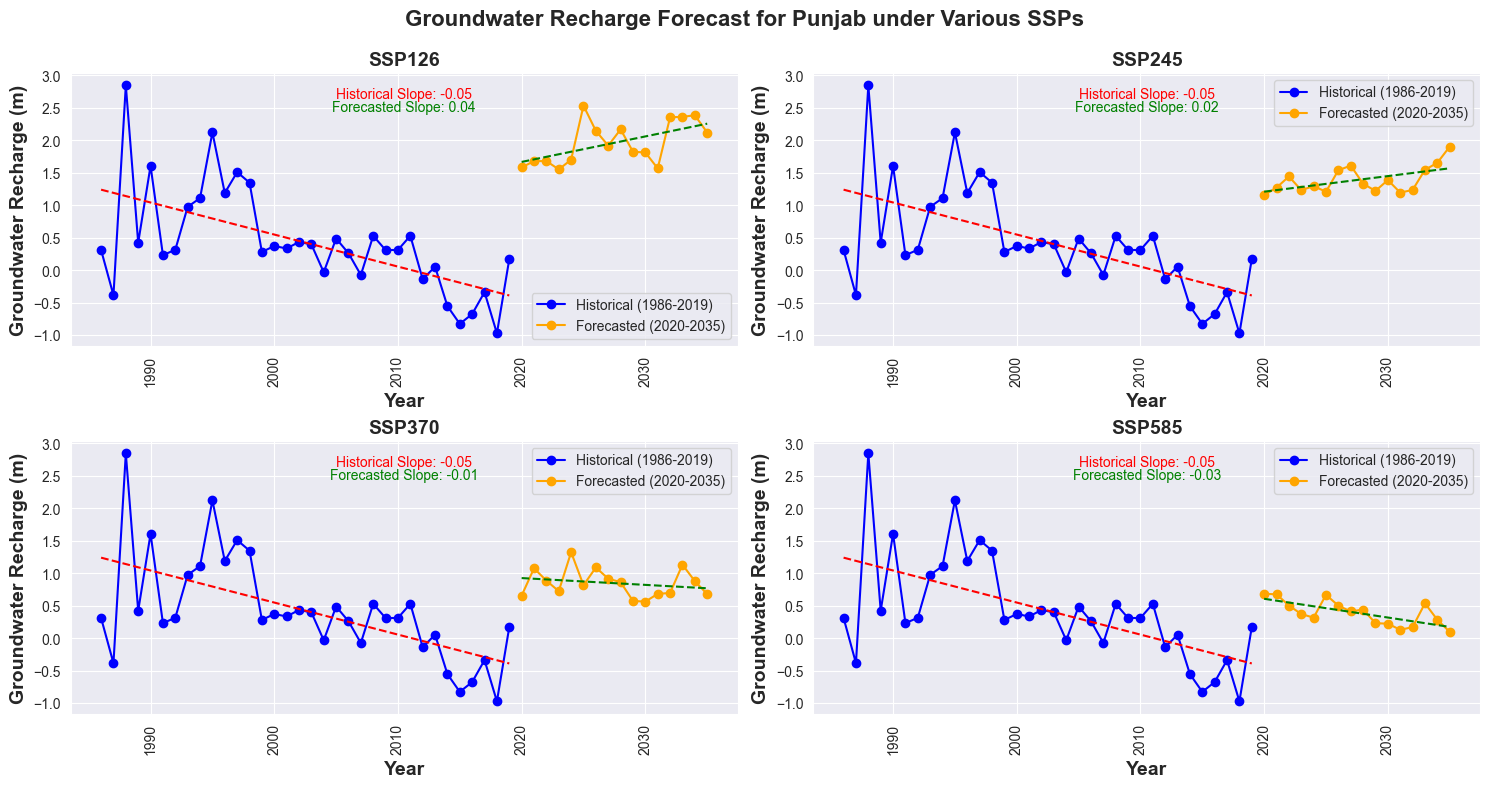

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

for i, ax in zip([126, 245, 370, 585], axes.flatten()):
    df = pd.read_excel(f"B:\GroundwaterRech\GithubRepo\Restart\Forecast_new\DistrictWise-Forecast(Pre-Post) (1)(1).xlsx", sheet_name=f'SSP{i}')
    df.drop('Slope', axis=1, inplace=True)
    years = df.columns[1:]
    averages = df[years].mean()

    historical_averages = averages[:34]
    forecasted_averages = averages[34:]

    historical_x = np.arange(len(historical_averages))
    historical_z = np.polyfit(historical_x, historical_averages, 1)
    historical_p = np.poly1d(historical_z)
    historical_trendline = historical_p(historical_x)

    forecasted_x = np.arange(len(forecasted_averages)) + len(historical_averages)
    forecasted_z = np.polyfit(forecasted_x, forecasted_averages, 1)
    forecasted_p = np.poly1d(forecasted_z)
    forecasted_trendline = forecasted_p(forecasted_x)

    ax.plot(averages.index[:34], averages.values[:34], color='blue', label='Historical (1986-2019)', marker='o')
    ax.plot(averages.index[34:], averages.values[34:], color='orange', label='Forecasted (2020-2035)', marker='o')
    ax.plot(averages.index[:34], historical_trendline, color='red', linestyle='--')
    ax.plot(averages.index[34:], forecasted_trendline, color='green', linestyle='--')

    historical_slope = historical_z[0]
    forecasted_slope = forecasted_z[0]
    ymax = max(max(historical_trendline), max(forecasted_trendline))
    ax.text(0.5, 0.95, f'Historical Slope: {historical_slope:.2f}', transform=ax.transAxes, color='red', ha='center', va='top')
    ax.text(0.5, 0.90, f'Forecasted Slope: {forecasted_slope:.2f}', transform=ax.transAxes, color='green', ha='center', va='top')

    ax.set_xlabel('Year',fontsize=14,fontweight='bold')
    ax.set_ylabel('Groundwater Recharge (m)',fontsize=14,fontweight='bold')
    ax.set_title(f'SSP{i}',fontsize=14,fontweight='bold')
    ax.legend()
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()

fig.suptitle('Groundwater Recharge Forecast for Punjab under Various SSPs', fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.90)
plt.savefig(f'B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Forecasted Plots Punjab\Subplotss.png', dpi=1200)
plt.show()


In [10]:
df=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\GroundwaterLevel\Dataset\DistrictWiseLEVEL.xlsx",sheet_name="rechaarge")

In [11]:
years = df['Year']
averages = df[f'SSP126']

### Groundwater Level Plot

In [2]:
df=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\GroundwaterLevel\Dataset\DistrictWiseLEVEL.xlsx",sheet_name="level")
df_recharge=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\GroundwaterLevel\Dataset\DistrictWiseLEVEL.xlsx",sheet_name="rechaarge")

In [6]:
df_recharge

Year    SSP126    SSP245    SSP370   SSP585
0   2020  1.482107  1.152857  0.654244 -0.56840
1   2021  1.577528  1.269572  1.074716 -0.42757
2   2022  1.579447  1.441381  0.884444 -0.64840
3   2023  1.450532  1.231747  0.722228 -0.78034
4   2024  1.600200  1.292615  1.322341 -0.83498
5   2025  2.432424  1.206792  0.814448 -0.48431
6   2026  2.044460  1.538086  1.087078 -0.65100
7   2027  1.817040  1.609315  0.914692 -0.74010
8   2028  2.067202  1.329565  0.861139 -0.71012
9   2029  1.722758  1.219702  0.571699 -0.82857
10  2030  1.711161  1.386474  0.561754 -0.82857
11  2031  1.466104  1.193429  0.680860 -1.02280
12  2032  2.254185  1.233974  0.694680 -0.98174
13  2033  2.260022  1.544387  1.130798 -0.61529
14  2034  2.284805  1.652175  0.877238 -0.86753
15  2035  2.018933  1.901478  0.676702 -1.05470

In [3]:
SSP_list=['SSP126','SSP245','SSP370','SSP585']
years = df['Year']

SSP126 = df['SSP126']
SSP245 = df['SSP245']
SSP370 = df['SSP370']
SSP585 = df['SSP585']

# Extract water recharge data for each SSP
Recharge_SSP126 = df_recharge['SSP126']
Recharge_SSP245 = df_recharge['SSP245']
Recharge_SSP370 = df_recharge['SSP370']
Recharge_SSP585 = df_recharge['SSP585']


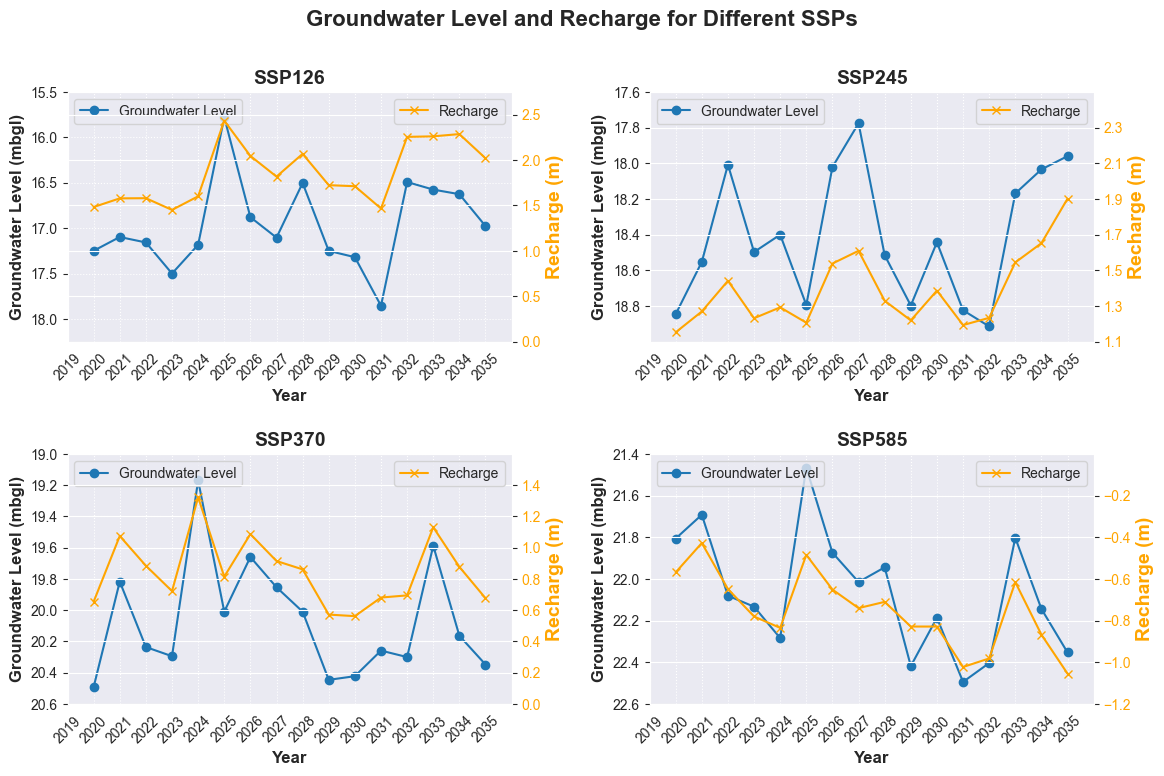

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

x_limits = [(2019, 2036), (2019, 2036), (2019, 2036), (2019, 2036)]

y_limits_left = [(18.25,15.5), (19,17.6), ( 20.6,19), (22.6,21.4)]  # (min,max)
y_limits_right = [(0,2.75 ), (1.1   , 2.5), (0, 1.6), (-1.2,0)]

step_size_x = [(1, 1), (1, 1), (1, 1), (1, 1)]

step_size_y_left = [(0.5, 0.5), (0.2, 0.2), (0.2, 0.2), (0.2, 0.2)]
step_size_y_right = [(0.5, 0.5), (0.2, 0.2), (0.2, 0.2), (0.2, 0.2)]

for i, ssp_data in enumerate([(SSP126, Recharge_SSP126), (SSP245, Recharge_SSP245),
                              (SSP370, Recharge_SSP370), (SSP585, Recharge_SSP585)]):
    ssp_level, ssp_recharge = ssp_data
    row, col = i // 2, i % 2

    axs[row, col].plot(years, ssp_level, label='Groundwater Level', marker='o')
    axs[row, col].set_title(f'{SSP_list[i]}', fontsize=14, fontweight='bold')
    axs[row, col].grid(True, which='both', linestyle='dotted')
    axs[row, col].legend(loc='upper left')

    axs[row, col].invert_yaxis()

    axs_recharge = axs[row, col].twinx()
    axs_recharge.plot(years, ssp_recharge, label='Recharge', marker='x', color='orange')
    axs_recharge.set_ylabel('Recharge (m)', color='orange', fontsize=14, fontweight='bold')
    axs_recharge.tick_params(axis='y', labelcolor='orange')
    axs_recharge.legend(loc='upper right')

    axs[row, col].set_xlabel('Year', fontsize=12, fontweight='bold')
    axs[row, col].set_ylabel('Groundwater Level (mbgl)', fontsize=12, fontweight='bold')

    axs[row, col].set_xlim(x_limits[i])
    axs[row, col].set_ylim(y_limits_left[i])
    axs_recharge.set_ylim(y_limits_right[i])

    x_ticks_step = np.arange(x_limits[i][0], x_limits[i][1], step_size_x[i][0])
    axs[row, col].set_xticks(x_ticks_step)

    y_ticks_left = np.arange(y_limits_left[i][1], y_limits_left[i][0], step_size_y_left[i][0])
    axs[row, col].set_yticks(y_ticks_left)

    y_ticks_right = np.arange(y_limits_right[i][0], y_limits_right[i][1], step_size_y_right[i][0])
    axs_recharge.set_yticks(y_ticks_right)

    axs[row, col].set_xticklabels(x_ticks_step, rotation=45)

plt.suptitle('Groundwater Level and Recharge for Different SSPs', fontsize=16, fontweight='bold')

plt.tight_layout(pad=2.0)

plt.savefig('B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\GWLevelForecastedwithRecssh.png', dpi=1200)

plt.show()

### Level vs Recharge with Trend


C:\Users\shash\AppData\Local\Temp\ipykernel_28636\3691162663.py:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  axs[row, col].plot(years, np.polyval(z_level, years), 'r--', color=line_color)
C:\Users\shash\AppData\Local\Temp\ipykernel_28636\3691162663.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b--" (-> color='b'). The keyword argument will take precedence.
  axs_recharge.plot(years, np.polyval(z_recharge, years), 'b--', color='orange')


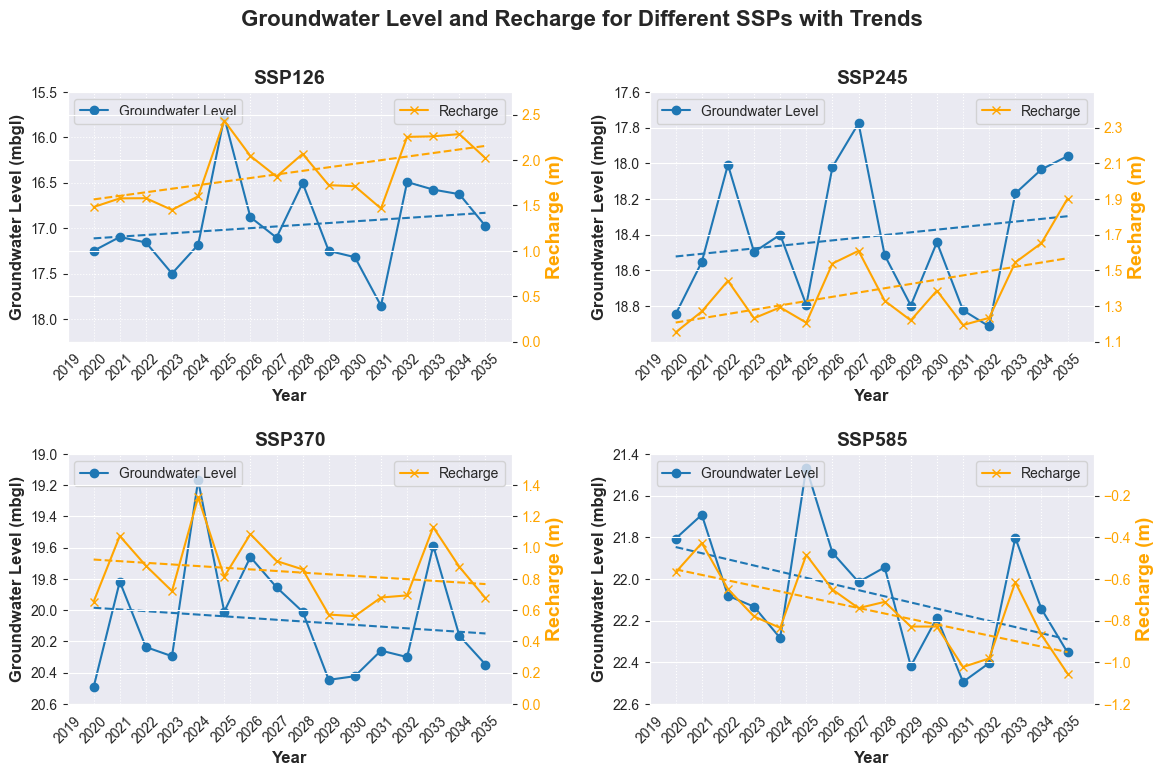

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

x_limits = [(2019, 2036), (2019, 2036), (2019, 2036), (2019, 2036)]

y_limits_left = [(18.25, 15.5), (19, 17.6), (20.6, 19), (22.6, 21.4)]  # (min,max)
y_limits_right = [(0, 2.75), (1.1, 2.5), (0, 1.6), (-1.2, 0)]

step_size_x = [(1, 1), (1, 1), (1, 1), (1, 1)]

step_size_y_left = [(0.5, 0.5), (0.2, 0.2), (0.2, 0.2), (0.2, 0.2)]
step_size_y_right = [(0.5, 0.5), (0.2, 0.2), (0.2, 0.2), (0.2, 0.2)]
for i, ssp_data in enumerate([(SSP126, Recharge_SSP126), (SSP245, Recharge_SSP245),
                              (SSP370, Recharge_SSP370), (SSP585, Recharge_SSP585)]):
    ssp_level, ssp_recharge = ssp_data
    row, col = i // 2, i % 2

    line_color = axs[row, col].plot(years, ssp_level, label='Groundwater Level', marker='o')[0].get_color()
    axs[row, col].set_title(f'{SSP_list[i]}', fontsize=14, fontweight='bold')
    axs[row, col].grid(True, which='both', linestyle='dotted')
    axs[row, col].legend(loc='upper left')

    axs[row, col].invert_yaxis()

    axs_recharge = axs[row, col].twinx()
    axs_recharge.plot(years, ssp_recharge, label='Recharge', marker='x', color='orange')
    axs_recharge.set_ylabel('Recharge (m)', color='orange', fontsize=14, fontweight='bold')
    axs_recharge.tick_params(axis='y', labelcolor='orange')
    axs_recharge.legend(loc='upper right')

    axs[row, col].set_xlabel('Year', fontsize=12, fontweight='bold')
    axs[row, col].set_ylabel('Groundwater Level (mbgl)', fontsize=12, fontweight='bold')

    axs[row, col].set_xlim(x_limits[i])
    axs[row, col].set_ylim(y_limits_left[i])
    axs_recharge.set_ylim(y_limits_right[i])

    x_ticks_step = np.arange(x_limits[i][0], x_limits[i][1], step_size_x[i][0])
    axs[row, col].set_xticks(x_ticks_step)

    y_ticks_left = np.arange(y_limits_left[i][1], y_limits_left[i][0], step_size_y_left[i][0])
    axs[row, col].set_yticks(y_ticks_left)

    y_ticks_right = np.arange(y_limits_right[i][0], y_limits_right[i][1], step_size_y_right[i][0])
    axs_recharge.set_yticks(y_ticks_right)

    axs[row, col].set_xticklabels(x_ticks_step, rotation=45)

    z_level = np.polyfit(years, ssp_level, 1)
    z_recharge = np.polyfit(years, ssp_recharge, 1)

    axs[row, col].plot(years, np.polyval(z_level, years), 'r--', color=line_color)
    axs_recharge.plot(years, np.polyval(z_recharge, years), 'b--', color='orange')

    axs[row, col].legend(loc='upper left')
    axs_recharge.legend(loc='upper right')

plt.suptitle('Groundwater Level and Recharge for Different SSPs with Trends', fontsize=16, fontweight='bold')

plt.tight_layout(pad=2.0)

plt.savefig('B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\GWLevelForecastedwithRecssh&Trend.png', dpi=1200)

plt.show()


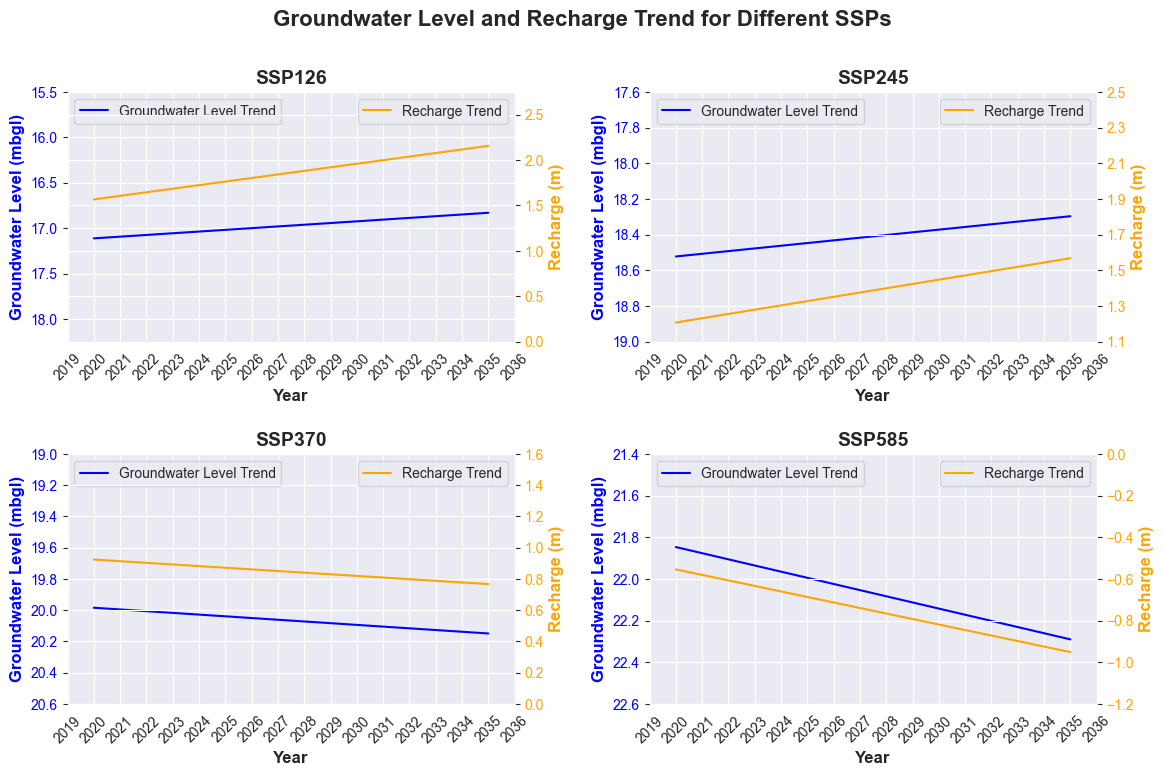

In [19]:

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
x_limits = [(2019, 2036), (2019, 2036), (2019, 2036), (2019, 2036)]

y_limits_left = [(18.25,15.5), (19,17.6), ( 20.6,19), (22.6,21.4)]  # (min,max)
y_limits_right = [(0,2.75 ), (1.1   , 2.5), (0, 1.6), (-1.2,0)]

step_size_x = [(1, 1), (1, 1), (1, 1), (1, 1)]

step_size_y_left = [(0.5, 0.5), (0.2, 0.2), (0.2, 0.2), (0.2, 0.2)]
step_size_y_right = [(0.5, 0.5), (0.2, 0.2), (0.2, 0.2), (0.2, 0.2)]

for i, ssp_data in enumerate([(SSP126, Recharge_SSP126), (SSP245, Recharge_SSP245),
                              (SSP370, Recharge_SSP370), (SSP585, Recharge_SSP585)]):
    ssp_level, ssp_recharge = ssp_data
    row, col = i // 2, i % 2

    slope_level, intercept_level, _, _, _ = linregress(years, ssp_level)
    trendline_level = intercept_level + slope_level * years

    slope_recharge, intercept_recharge, _, _, _ = linregress(years, ssp_recharge)
    trendline_recharge = intercept_recharge + slope_recharge * years


    axs[row, col].plot(years, trendline_level, label='Groundwater Level Trend', linestyle='-', color='blue')
    axs[row, col].set_ylabel('Groundwater Level (mbgl)', fontsize=12, fontweight='bold', color='blue')
    axs[row, col].tick_params(axis='y', labelcolor='blue')

    axs_twin = axs[row, col].twinx()
    axs_twin.plot(years, trendline_recharge, label='Recharge Trend', linestyle='-', color='orange')
    axs_twin.set_ylabel('Recharge (m)', fontsize=12, fontweight='bold', color='orange')
    axs_twin.tick_params(axis='y', labelcolor='orange')

    axs[row, col].set_xlim(x_limits[i][0], x_limits[i][1])
    axs[row, col].set_ylim(y_limits_left[i][0], y_limits_left[i][1])
    axs_twin.set_ylim(y_limits_right[i][0], y_limits_right[i][1])

    axs[row, col].set_xticks(range(x_limits[i][0], x_limits[i][1] + 1, step_size_x[i][0]))
    axs[row, col].set_yticks(np.arange(y_limits_left[i][1], y_limits_left[i][0] + 0.1, step_size_y_left[i][0]))
    axs_twin.set_yticks(np.arange(y_limits_right[i][0], y_limits_right[i][1] + 0.1, step_size_y_right[i][0]))
    axs[row, col].set_title(f'{SSP_list[i]}', fontsize=14, fontweight='bold')
    # axs[row, col].grid(True, which='both', linestyle='dotted')

    axs[row, col].legend(loc='upper left')
    axs_twin.legend(loc='upper right')

    axs[row, col].set_xlabel('Year', fontsize=12, fontweight='bold')

    axs[row, col].set_xticklabels(range(x_limits[i][0], x_limits[i][1] + 1, step_size_x[i][0]), rotation=45)

plt.suptitle('Groundwater Level and Recharge Trend for Different SSPs', fontsize=16, fontweight='bold')

plt.tight_layout(pad=2.0)

plt.savefig('B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\GWLevelTrend.png', dpi=1200)

plt.show()

In [ ]:
from scipy.stats import linregress
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ssp_data in enumerate([(SSP126, Recharge_SSP126), (SSP245, Recharge_SSP245),
                              (SSP370, Recharge_SSP370), (SSP585, Recharge_SSP585)]):
    ssp_level, ssp_recharge = ssp_data
    row, col = i // 2, i % 2

    slope_level, intercept_level, _, _, _ = linregress(years, ssp_level)
    trendline_level = intercept_level + slope_level * years

    slope_recharge, intercept_recharge, _, _, _ = linregress(years, ssp_recharge)
    trendline_recharge = intercept_recharge + slope_recharge * years

    axs[row, col].plot(years, trendline_level, label='Groundwater Level Trend', linestyle='-', color='blue')
    axs[row, col].set_ylabel('Groundwater Level', fontsize=12, fontweight='bold', color='blue')
    axs[row, col].tick_params(axis='y', labelcolor='blue')

    axs_twin = axs[row, col].twinx()
    axs_twin.plot(years, trendline_recharge, label='Recharge Trend', linestyle='-', color='orange')
    axs_twin.set_ylabel('Recharge', fontsize=12, fontweight='bold', color='orange')
    axs_twin.tick_params(axis='y', labelcolor='orange')

    axs[row, col].set_ylim(min(trendline_level.min(), ssp_level.min()), max(trendline_level.max(), ssp_level.max()))
    axs_twin.set_ylim(min(trendline_recharge.min(), ssp_recharge.min()), max(trendline_recharge.max(), ssp_recharge.max()))

    axs[row, col].set_title(f'{SSP_list[i]}', fontsize=14, fontweight='bold')

    axs[row, col].legend(loc='upper left')
    axs_twin.legend(loc='upper right')

    axs[row, col].set_xlabel('Year', fontsize=12, fontweight='bold')

    axs[row, col].set_xticks(years[::1])

    axs[row, col].set_xticklabels(years[::1], rotation=45)

    axs[row, col].grid(False)
    axs_twin.grid(False)

plt.suptitle('Groundwater Level and Recharge Trend for Different SSPs', fontsize=16, fontweight='bold')

plt.tight_layout(pad=2.0)

plt.savefig('B:\GroundwaterRech\GithubRepo\Restart\Results\Images\GWLevelTrend.png', dpi=1200)

plt.show()


### Groundwater Level -Historical and Forecasted Data

In [8]:
df=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\GroundwaterLevel\Dataset\DistrictWiseLEVEL.xlsx",sheet_name="Historical_Level")
SSP_list=['SSP126','SSP245','SSP370','SSP585']
years = df['Year']


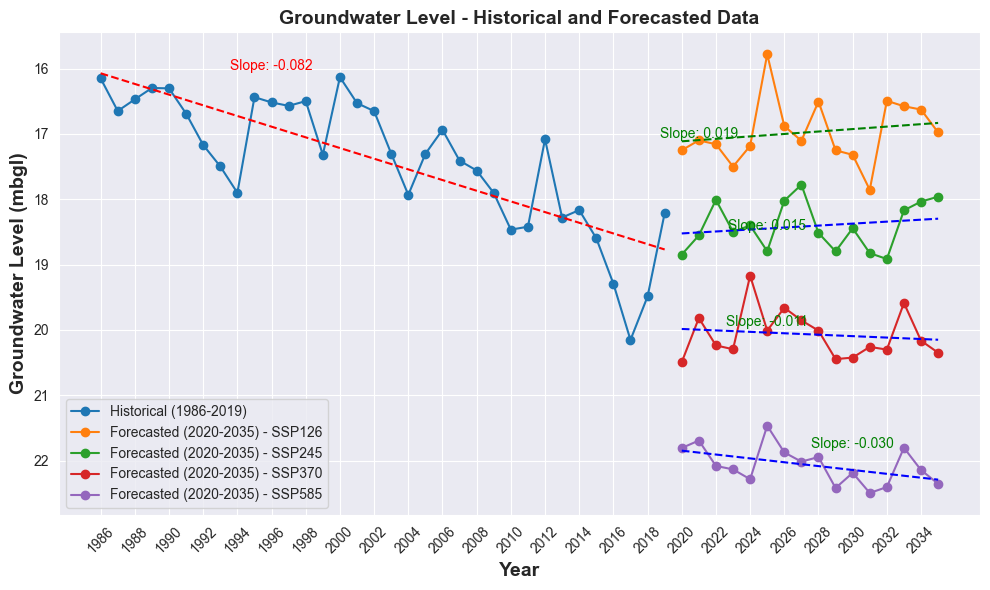

In [10]:
plt.figure(figsize=(10, 6))
historical_data = df.loc[df['Year'] <= 2019]
plt.plot(historical_data['Year'], historical_data['SSP126'], marker='o', label='Historical (1986-2019)')
historical_x = historical_data['Year']
historical_y = historical_data['SSP126']
historical_trend = np.polyfit(historical_x, historical_y, 1)
plt.plot(historical_x, np.polyval(historical_trend, historical_x), 'r--', )
plt.text(historical_x.iloc[10], np.polyval(historical_trend, historical_x.iloc[0]), f'Slope: {-1*historical_trend[0]:.3f}', color='red', ha='center', va='bottom')

forecasted_ssp126 = df.loc[df['Year'] >= 2020]['SSP126']
plt.plot(range(2020, 2036), forecasted_ssp126, marker='o', label='Forecasted (2020-2035) - SSP126')
forecasted_x = np.arange(2020, 2036)
forecasted_trend = np.polyfit(forecasted_x, forecasted_ssp126, 1)
plt.plot(forecasted_x, np.polyval(forecasted_trend, forecasted_x), 'g--', )
plt.text(forecasted_x[1], np.polyval(forecasted_trend, forecasted_x[0]), f'Slope: {-1*forecasted_trend[0]:.3f}', color='green', ha='center', va='bottom')

# Forecasted Data for SSP245
forecasted_ssp245 = df.loc[df['Year'] >= 2020]['SSP245']
plt.plot(range(2020, 2036), forecasted_ssp245, marker='o', label='Forecasted (2020-2035) - SSP245')
forecasted_trend = np.polyfit(forecasted_x, forecasted_ssp245, 1)
plt.plot(forecasted_x, np.polyval(forecasted_trend, forecasted_x), 'b--', )
plt.text(forecasted_x[5], np.polyval(forecasted_trend, forecasted_x[0]), f'Slope: {-1*forecasted_trend[0]:.3f}', color='green', ha='center', va='bottom')

# Forecasted Data for SSP370
forecasted_ssp370 = df.loc[df['Year'] >= 2020]['SSP370']
plt.plot(range(2020, 2036), forecasted_ssp370, marker='o', label='Forecasted (2020-2035) - SSP370')
forecasted_trend = np.polyfit(forecasted_x, forecasted_ssp370, 1)
plt.plot(forecasted_x, np.polyval(forecasted_trend, forecasted_x), 'b--', )
plt.text(forecasted_x[5], np.polyval(forecasted_trend, forecasted_x[0]), f'Slope: {-1*forecasted_trend[0]:.3f}', color='green', ha='center', va='bottom')

# Forecasted Data for SSP585
forecasted_ssp585 = df.loc[df['Year'] >= 2020]['SSP585']
plt.plot(range(2020, 2036), forecasted_ssp585, marker='o', label='Forecasted (2020-2035) - SSP585')
forecasted_trend = np.polyfit(forecasted_x, forecasted_ssp585, 1)
plt.plot(forecasted_x, np.polyval(forecasted_trend, forecasted_x), 'b--')
plt.text(forecasted_x[10], np.polyval(forecasted_trend, forecasted_x[0]), f'Slope: {-1*forecasted_trend[0]:.3f}', color='green', ha='center', va='bottom')

plt.gca().invert_yaxis()

plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Groundwater Level (mbgl)', fontsize=14, fontweight='bold')
plt.title('Groundwater Level - Historical and Forecasted Data', fontsize=14, fontweight='bold')
plt.legend()
plt.xticks(range(1986, 2036,2), rotation=45)
plt.grid(True)

plt.tight_layout()
plt.savefig('B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\OverallHits&ForecastedPunjab.png', dpi=1200)
plt.show()

### Groundwater Recharge -Historical and Forecasted Data

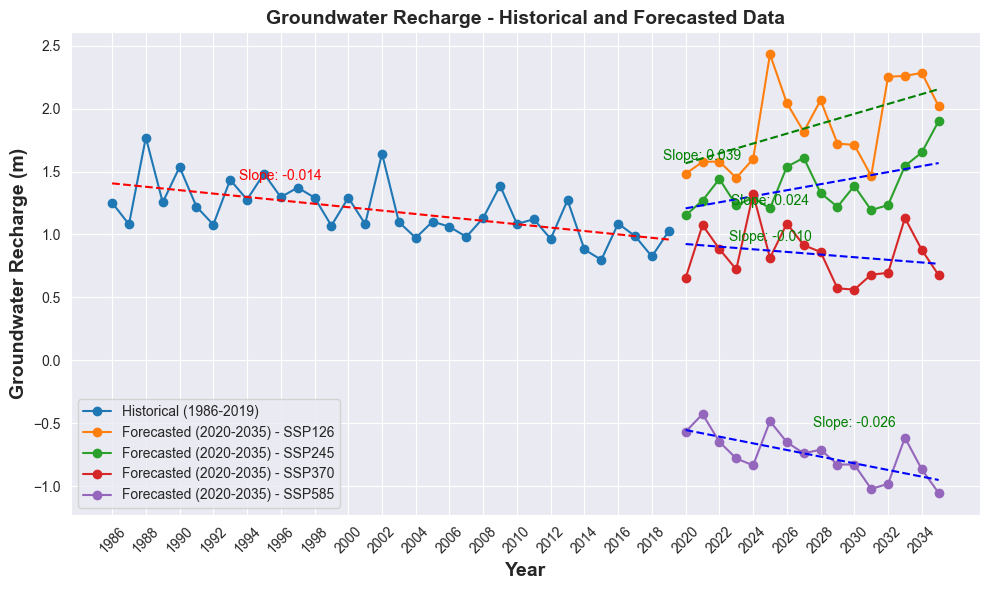

In [3]:
df=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\GroundwaterLevel\Dataset\DistrictWiseLEVEL.xlsx",sheet_name="Historical_Recharge")

plt.figure(figsize=(10, 6))

historical_data = df.loc[df['Year'] <= 2019]
plt.plot(historical_data['Year'], historical_data['SSP126'], marker='o', label='Historical (1986-2019)')
historical_x = historical_data['Year']
historical_y = historical_data['SSP126']
historical_trend = np.polyfit(historical_x, historical_y, 1)
plt.plot(historical_x, np.polyval(historical_trend, historical_x), 'r--', )
plt.text(historical_x.iloc[10], np.polyval(historical_trend, historical_x.iloc[0]), f'Slope: {historical_trend[0]:.3f}', color='red', ha='center', va='bottom')

forecasted_ssp126 = df.loc[df['Year'] >= 2020]['SSP126']
plt.plot(range(2020, 2036), forecasted_ssp126, marker='o', label='Forecasted (2020-2035) - SSP126')
forecasted_x = np.arange(2020, 2036)
forecasted_trend = np.polyfit(forecasted_x, forecasted_ssp126, 1)
plt.plot(forecasted_x, np.polyval(forecasted_trend, forecasted_x), 'g--', )
plt.text(forecasted_x[1], np.polyval(forecasted_trend, forecasted_x[0]), f'Slope: {forecasted_trend[0]:.3f}', color='green', ha='center', va='bottom')

# Forecasted Data for SSP245
forecasted_ssp245 = df.loc[df['Year'] >= 2020]['SSP245']
plt.plot(range(2020, 2036), forecasted_ssp245, marker='o', label='Forecasted (2020-2035) - SSP245')
forecasted_trend = np.polyfit(forecasted_x, forecasted_ssp245, 1)
plt.plot(forecasted_x, np.polyval(forecasted_trend, forecasted_x), 'b--', )
plt.text(forecasted_x[5], np.polyval(forecasted_trend, forecasted_x[0]), f'Slope: {forecasted_trend[0]:.3f}', color='green', ha='center', va='bottom')

# Forecasted Data for SSP370
forecasted_ssp370 = df.loc[df['Year'] >= 2020]['SSP370']
plt.plot(range(2020, 2036), forecasted_ssp370, marker='o', label='Forecasted (2020-2035) - SSP370')
forecasted_trend = np.polyfit(forecasted_x, forecasted_ssp370, 1)
plt.plot(forecasted_x, np.polyval(forecasted_trend, forecasted_x), 'b--', )
plt.text(forecasted_x[5], np.polyval(forecasted_trend, forecasted_x[0]), f'Slope: {forecasted_trend[0]:.3f}', color='green', ha='center', va='bottom')

# Forecasted Data for SSP585
forecasted_ssp585 = df.loc[df['Year'] >= 2020]['SSP585']
plt.plot(range(2020, 2036), forecasted_ssp585, marker='o', label='Forecasted (2020-2035) - SSP585')
forecasted_trend = np.polyfit(forecasted_x, forecasted_ssp585, 1)
plt.plot(forecasted_x, np.polyval(forecasted_trend, forecasted_x), 'b--')
plt.text(forecasted_x[10], np.polyval(forecasted_trend, forecasted_x[0]), f'Slope: {forecasted_trend[0]:.3f}', color='green', ha='center', va='bottom')



plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Groundwater Recharge (m)', fontsize=14, fontweight='bold')
plt.title('Groundwater Recharge - Historical and Forecasted Data', fontsize=14, fontweight='bold')
plt.legend()
plt.xticks(range(1986, 2036,2), rotation=45)
plt.grid(True)

plt.tight_layout()
plt.savefig('B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\OverallHist&ForecastedPunjab_Recharge.png', dpi=1200)
plt.show()


### Spider Plot


In [3]:
dfc_2020=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\Forecast_new\compare.xlsx",sheet_name='C2020')
dfc_2022=pd.read_excel("B:\GroundwaterRech\GithubRepo\Restart\Forecast_new\compare.xlsx",sheet_name='C2022')


In [4]:
districts=dfc_2020['District '].values
recharge_ccwb_2020 = dfc_2020['CCWB'].values
recharge_ai_2020 = dfc_2020['AI'].values
recharge_ccwb_2022 = dfc_2022['CCWB'].values
recharge_ai_2022 = dfc_2022['AI'].values

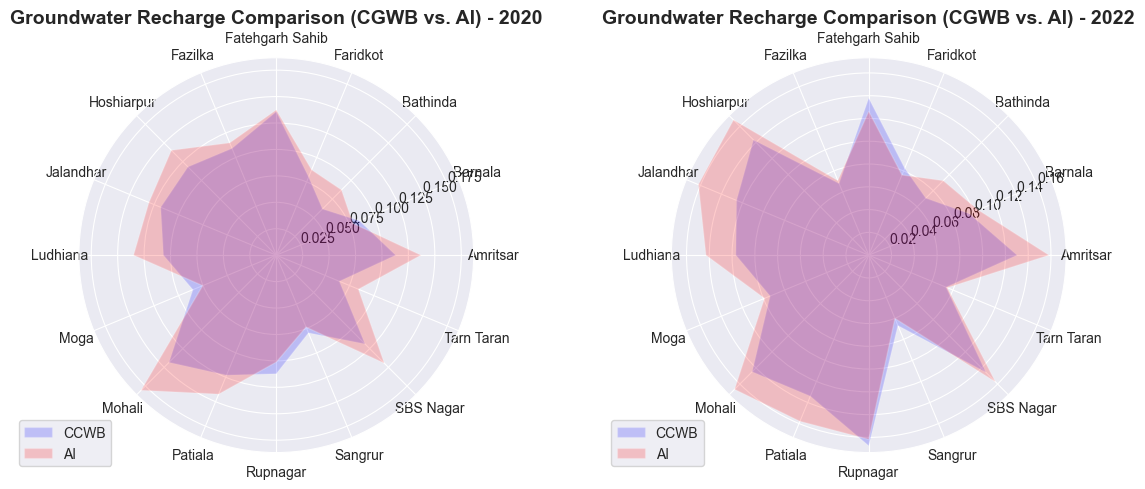

In [5]:
num_districts = len(districts)

angles = np.linspace(0, 2 * np.pi, num_districts, endpoint=False).tolist()
angles += angles[:1]

def plot_radar(data_ccwb, data_ai, year, ax):
    ax.fill(angles, data_ccwb.tolist() + data_ccwb[:1].tolist(), 'b', alpha=0.2, label='CCWB')

    ax.fill(angles, data_ai.tolist() + data_ai[:1].tolist(), 'r', alpha=0.2, label='AI')

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(districts)
    ax.set_title(f'Groundwater Recharge Comparison (CGWB vs. AI) - {year}', fontsize=14,fontweight='bold')
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'polar': True})

plot_radar(recharge_ccwb_2020, recharge_ai_2020, '2020', ax1)
plot_radar(recharge_ccwb_2022, recharge_ai_2022, '2022', ax2)

plt.tight_layout()

plt.savefig('B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Radar_ComparePlot.png', dpi=1200)
plt.show()

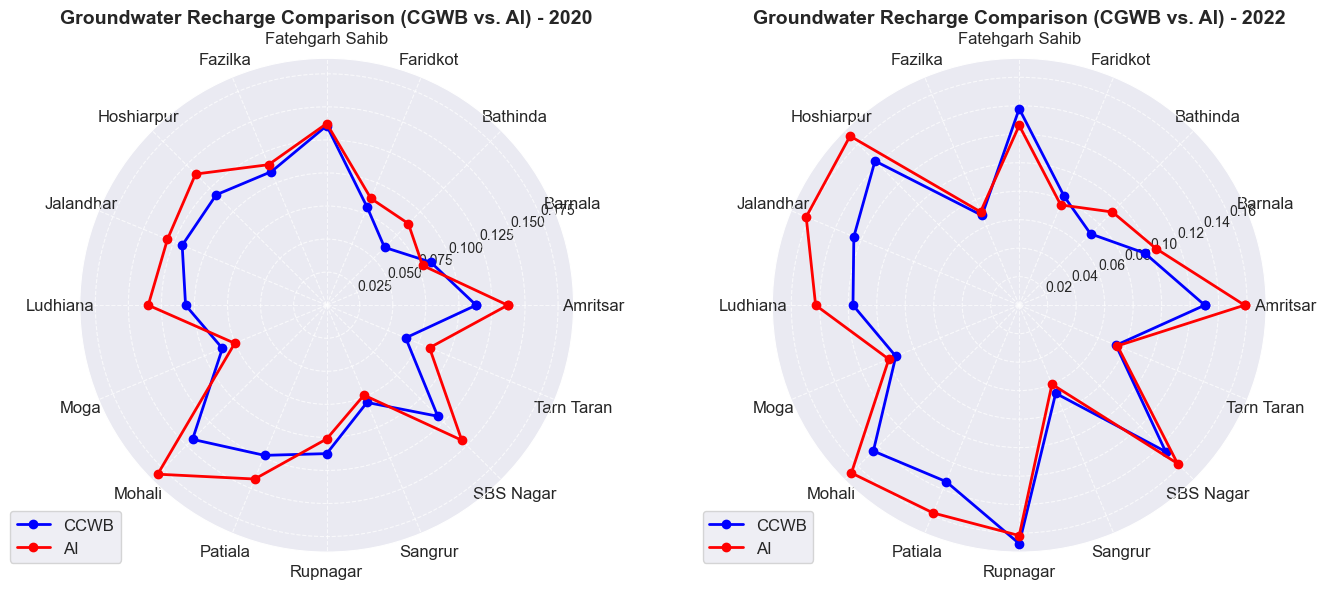

In [6]:
num_districts = len(districts)

angles = np.linspace(0, 2 * np.pi, num_districts, endpoint=False).tolist()
angles += angles[:1]  # To close the plot

def plot_radar(data_ccwb, data_ai, year, ax):
    ax.plot(angles, data_ccwb.tolist() + data_ccwb[:1].tolist(), 'b', marker='o', label='CCWB', linewidth=2)

    ax.plot(angles, data_ai.tolist() + data_ai[:1].tolist(), 'r', marker='o', label='AI', linewidth=2)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(districts, fontsize=12)
    ax.set_title(f'Groundwater Recharge Comparison (CGWB vs. AI) - {year}', fontsize=14,fontweight='bold')
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'polar': True})

plot_radar(recharge_ccwb_2020, recharge_ai_2020, '2020', ax1)
plot_radar(recharge_ccwb_2022, recharge_ai_2022, '2022', ax2)

plt.tight_layout()


plt.savefig('B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Radar_ComparePlot2.png', dpi=1200)

plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_13404\636872568.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(angles, data_ccwb.tolist() + data_ccwb[:1].tolist(), 'b', marker='o', label='CCWB', linewidth=2, color='blue')
C:\Users\shash\AppData\Local\Temp\ipykernel_13404\636872568.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(angles, data_ai.tolist() + data_ai[:1].tolist(), 'b', marker='o', label='AI', linewidth=2, color='lightblue')


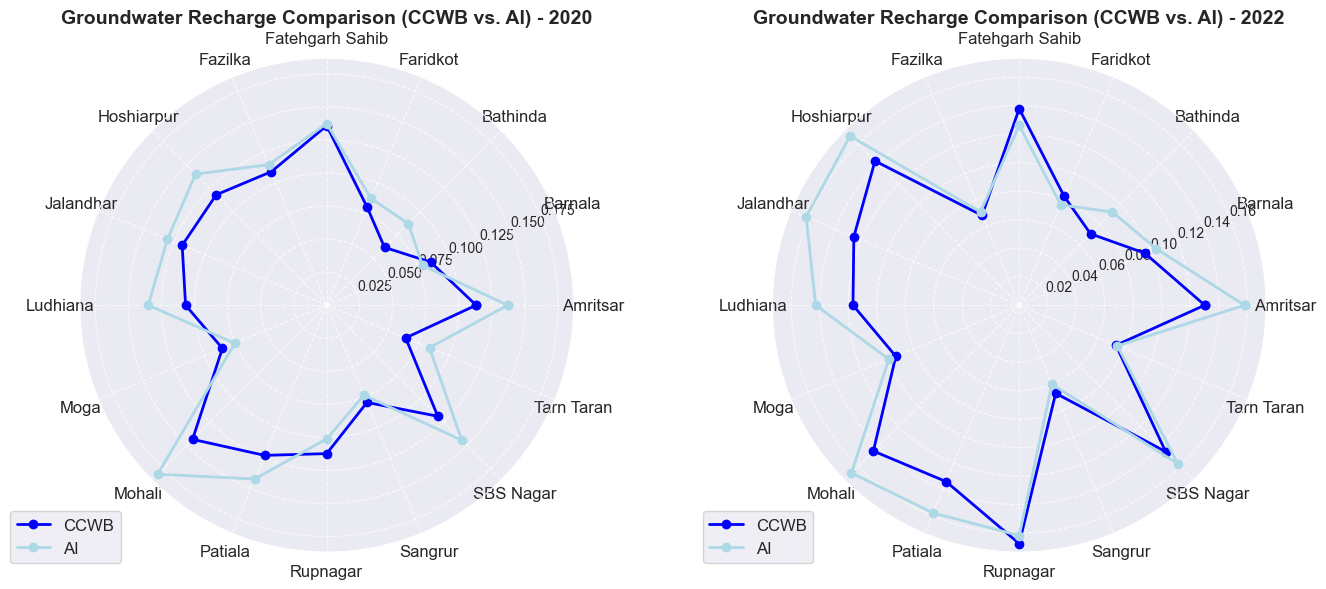

In [13]:
num_districts = len(districts)

angles = np.linspace(0, 2 * np.pi, num_districts, endpoint=False).tolist()
angles += angles[:1]  # To close the plot

def plot_radar(data_ccwb, data_ai, year, ax):
    ax.plot(angles, data_ccwb.tolist() + data_ccwb[:1].tolist(), 'b', marker='o', label='CCWB', linewidth=2, color='blue')

    ax.plot(angles, data_ai.tolist() + data_ai[:1].tolist(), 'b', marker='o', label='AI', linewidth=2, color='lightblue')

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(districts, fontsize=12)
    ax.set_title(f'Groundwater Recharge Comparison (CCWB vs. AI) - {year}', fontsize=14, fontweight='bold')
    ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.7)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'polar': True})

plot_radar(recharge_ccwb_2020, recharge_ai_2020, '2020', ax1)
plot_radar(recharge_ccwb_2022, recharge_ai_2022, '2022', ax2)

plt.tight_layout()

plt.savefig('B:\GroundwaterRech\GithubRepo\Restart\Results\Images(new)\Radar_ComparePlot3.png', dpi=1200)

plt.show()